## EDA and Modelling to predict the Team LeaderBoard of Pro Kabbadi 2019

### Team Analysis

### Reading data from file

In [1]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

In [2]:
# import all libraries and dependencies for dataframe
from pyforest import *
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.base import TransformerMixin

In [3]:
# Local file path. Please change the file path accordingly

path = 'C:\\Users\\I330405\\Documents\\HACKATHON\\'

In [4]:
# Reading the Team_Stat file on which Analysis needs to be done

file = path + 'Team_Stats_Season 7_30th morning.xlsx'
df_Bengal = pd.read_excel(file,'BW')

#df_Bengal.head()

In [5]:
df_Bengaluru = pd.read_excel(file,'BB')

#df_Bengaluru.head(2)

In [6]:
df_Delhi = pd.read_excel(file,'DD')

#df_Delhi.head()

In [7]:
df_Gujrat = pd.read_excel(file,'GF')

#df_Gujrat.head()

In [8]:
df_Haryana = pd.read_excel(file,'HS')

#df_Haryana.head()

In [9]:
df_Jaipur = pd.read_excel(file,'JPP')

#df_Jaipur.head()

In [10]:
df_Patna = pd.read_excel(file,'PPIRATE')

#df_Patna.head()

In [11]:
df_Pune = pd.read_excel(file,'PPUL')

#df_Pune.head()

In [12]:
df_Tamil = pd.read_excel(file,'TTHA')

#df_Tamil.head()

In [13]:
df_Telgu = pd.read_excel(file,'TTITANS')

#df_Telgu.head()

In [14]:
df_Mumbai = pd.read_excel(file,'UMUM')

#df_Mumbai.head()

In [15]:
df_UP = pd.read_excel(file,'UPYO')

#df_UP.head()

### Teams Seasonwise Analysis

In [16]:
df_teams = df_Bengal.append([df_Bengaluru,df_Delhi,df_Gujrat,df_Haryana,df_Jaipur,df_Patna,df_Pune,df_Tamil,df_Telgu,df_Mumbai,df_UP])
df_teams = df_teams.set_index('SEASONS',drop=True)
df_teams = df_teams.reset_index()
df_teams.head(10)

,SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED
0,Bengal Warriors,125,56,15,54,2.7000,5310,1786,1149,2375,0.4200,70,1749,487,2236,2835,1025,1810,0.3900,98,133,266,1118,nan
1,Bengal Warriors_SEASON 7,20,13,3,4,10.0000,823,340,159,324,0.5200,15,346,80,426,472,182,290,0.4100,12,34,68,192,17.0000
2,Bengal Warriors_SEASON 6,23,12,2,9,3.0000,963,340,201,422,0.4500,16,341,95,436,508,186,322,0.3900,16,23,46,200,nan
3,Bengal Warriors_SEASON 5,24,11,6,7,1.5000,1079,379,223,477,0.4200,11,333,122,455,521,181,340,0.3700,12,27,54,193,nan
4,Bengal Warriors_SEASON 4,14,3,2,9,4.0000,602,167,125,310,0.3400,4,154,48,202,318,117,201,0.3900,8,11,22,125,nan
5,Bengal Warriors_SEASON 3,16,9,0,7,2.0000,702,213,144,345,0.3600,4,204,46,250,329,137,192,0.4600,13,17,34,150,nan
6,Bengal Warriors_SEASON 2,14,4,1,9,3.0000,595,134,151,310,0.3100,9,151,33,184,306,116,190,0.4400,21,10,20,136,nan
7,Bengal Warriors_SEASON 1,14,4,1,9,3.5000,546,213,146,187,0.5200,11,220,63,283,381,106,275,0.3200,16,11,22,122,nan
8,Bengaluru Bulls,125,58,8,59,3.7000,5327,1810,1245,2272,0.4300,63,1811,475,2286,2740,1086,1654,0.4300,93,152,298,1172,nan
9,Bengaluru Bulls_SEASON 7,19,10,1,8,20.0000,794,309,213,272,0.4900,8,295,98,393,438,168,270,0.4400,25,21,42,191,24.0000


In [17]:
df_teams['WINS%'] = df_teams['WINS']/df_teams['MATCHES PLAYED']
df_teams['DRAWS%'] = df_teams['DRAWS']/df_teams['MATCHES PLAYED']
df_teams['LOSSES%'] = df_teams['LOSSES']/df_teams['MATCHES PLAYED']
df_teams['AVG SUCCESSFUL TACKLES'] = df_teams['SUCCESSFUL TACKLES']/df_teams['MATCHES PLAYED']
df_teams['AVG SUCCESSFUL RAIDS'] = df_teams['SUCCESSFUL RAIDS']/df_teams['MATCHES PLAYED']
df_teams['AVG ALL OUTS INFLICTED'] = df_teams['ALL OUTS INFLICTED']/df_teams['MATCHES PLAYED']
df_teams['AVG ALL OUTS CONCEEDED'] = df_teams['ALL OUTS CONCEEDED']/df_teams['MATCHES PLAYED']

In [18]:
df_teams.head()

,SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED
0,Bengal Warriors,125,56,15,54,2.7000,5310,1786,1149,2375,0.4200,70,1749,487,2236,2835,1025,1810,0.3900,98,133,266,1118,nan,0.4480,0.1200,0.4320,8.2000,14.2880,1.0640,nan
1,Bengal Warriors_SEASON 7,20,13,3,4,10.0000,823,340,159,324,0.5200,15,346,80,426,472,182,290,0.4100,12,34,68,192,17.0000,0.6500,0.1500,0.2000,9.1000,17.0000,1.7000,0.8500
2,Bengal Warriors_SEASON 6,23,12,2,9,3.0000,963,340,201,422,0.4500,16,341,95,436,508,186,322,0.3900,16,23,46,200,nan,0.5217,0.0870,0.3913,8.0870,14.7826,1.0000,nan
3,Bengal Warriors_SEASON 5,24,11,6,7,1.5000,1079,379,223,477,0.4200,11,333,122,455,521,181,340,0.3700,12,27,54,193,nan,0.4583,0.2500,0.2917,7.5417,15.7917,1.1250,nan
4,Bengal Warriors_SEASON 4,14,3,2,9,4.0000,602,167,125,310,0.3400,4,154,48,202,318,117,201,0.3900,8,11,22,125,nan,0.2143,0.1429,0.6429,8.3571,11.9286,0.7857,nan


#### Season 1 to Season 7 Data

In [19]:
df_Bengal_Warrior = df_teams.loc[1:7,:]
df_Bengaluru_Bulls = df_teams.loc[8:15,:]
df_Delhi_Dabangs = df_teams.loc[16:23,:]
df_Gujrat_Fortunegiants = df_teams.loc[24:27,:]
df_Haryana_Steelers = df_teams.loc[28:31,:]
df_Jaipur_Pink_Panthers = df_teams.loc[32:39,:]
df_Patna_Pirates = df_teams.loc[40:47,:]
df_Puneri_Paltan = df_teams.loc[48:55,:]
df_Tamil_Thalaivas = df_teams.loc[56:59,:]
df_Telugu_Titans = df_teams.loc[60:67,:]
df_U_Mumba = df_teams.loc[68:75,:]
df_UP_Yoddha = df_teams.loc[76:,:]

### Bengal_Warrior

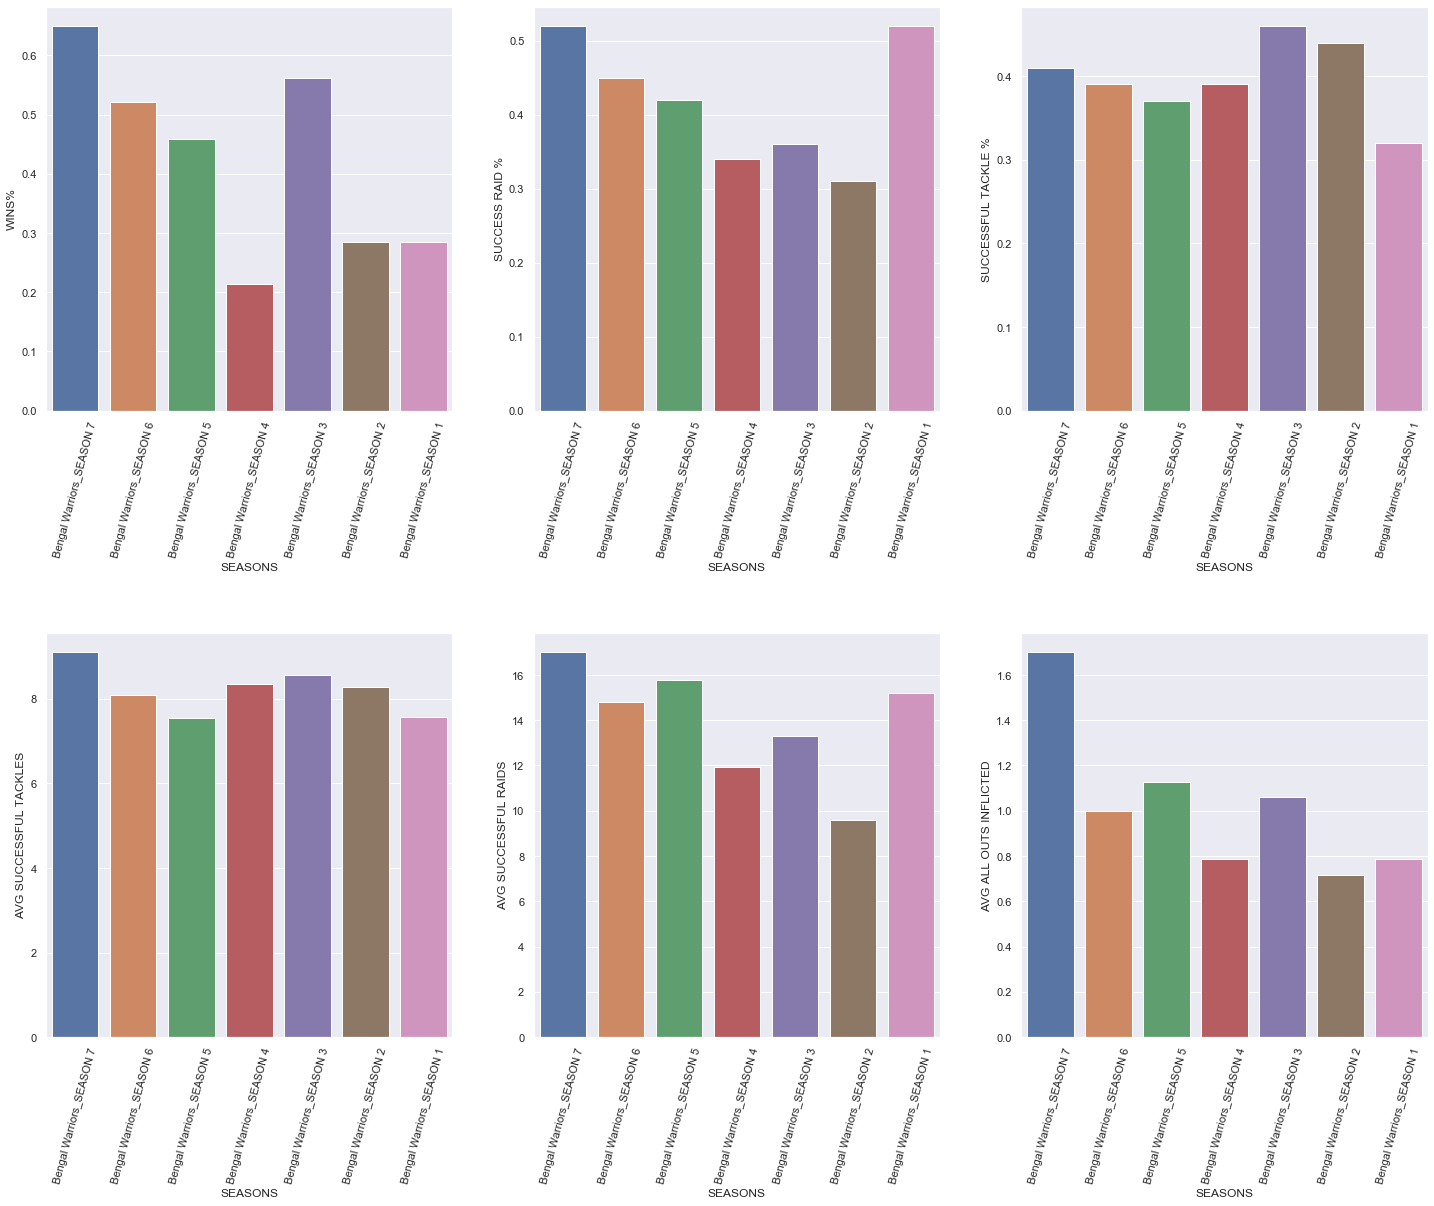

In [20]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Bengal_Warrior,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=75)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Bengal_Warrior,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=75)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Bengal_Warrior,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=75)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Bengal_Warrior,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=75)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Bengal_Warrior,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=75)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Bengal_Warrior,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=75)

### Bengaluru_Bulls

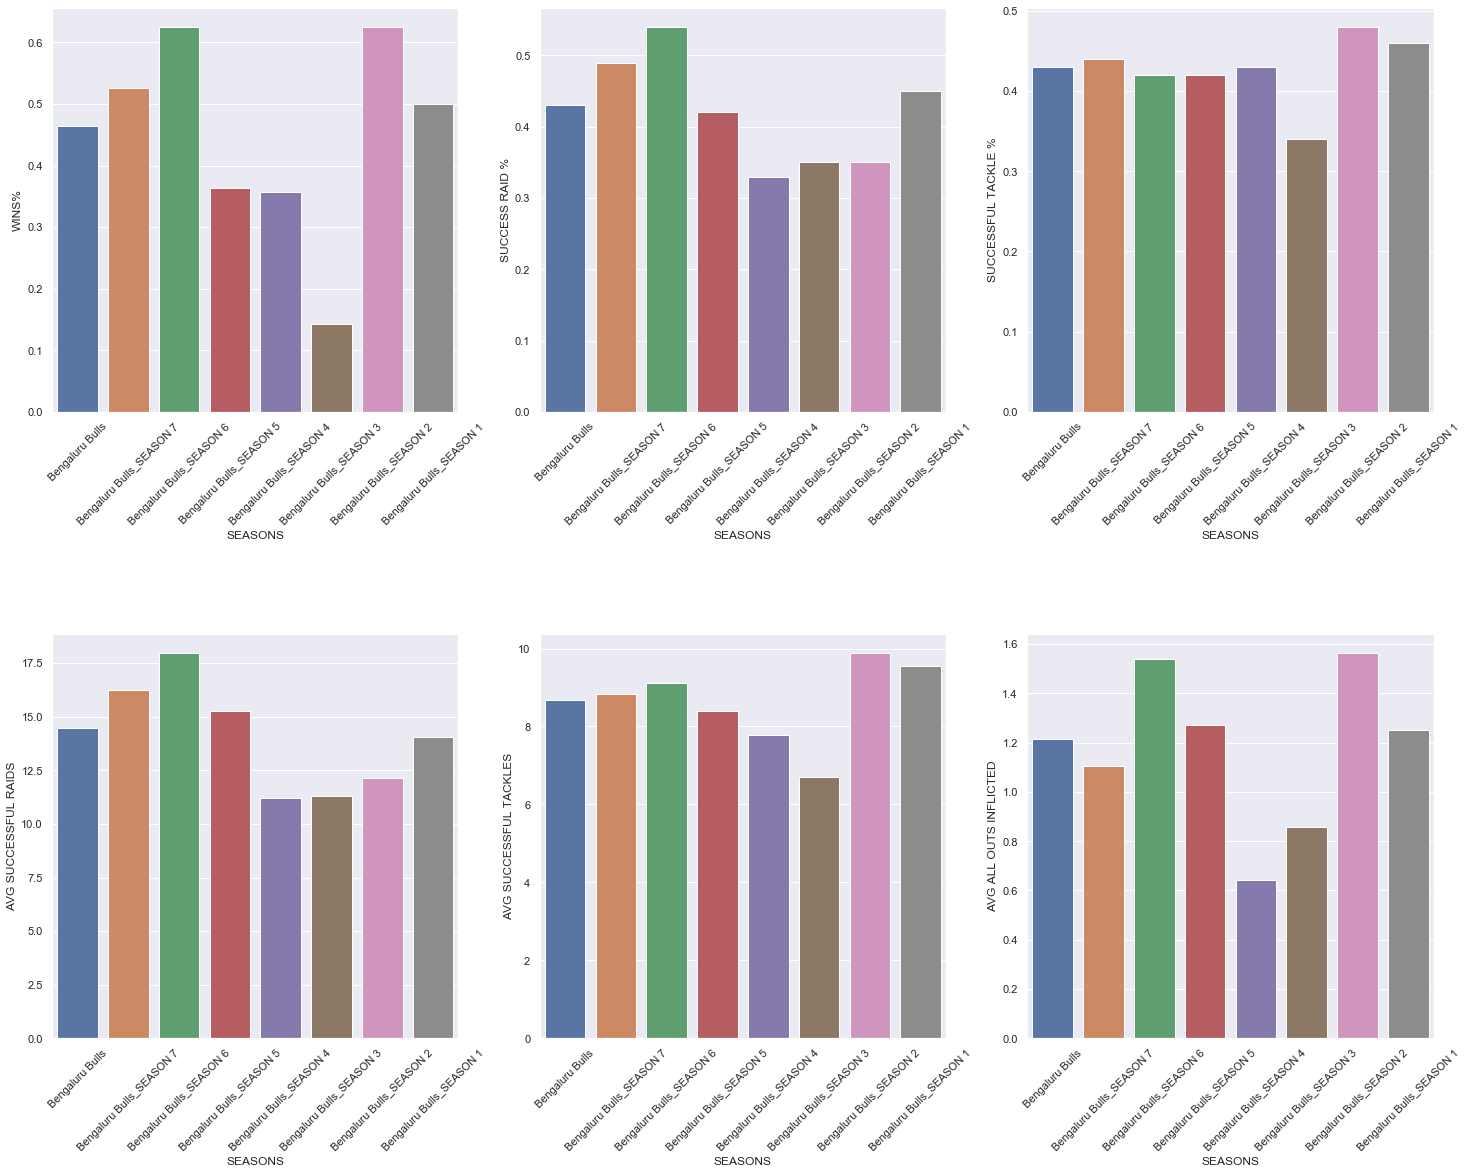

In [21]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Bengaluru_Bulls,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Bengaluru_Bulls,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Bengaluru_Bulls,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Bengaluru_Bulls,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Bengaluru_Bulls,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Bengaluru_Bulls,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Delhi_Dabangs

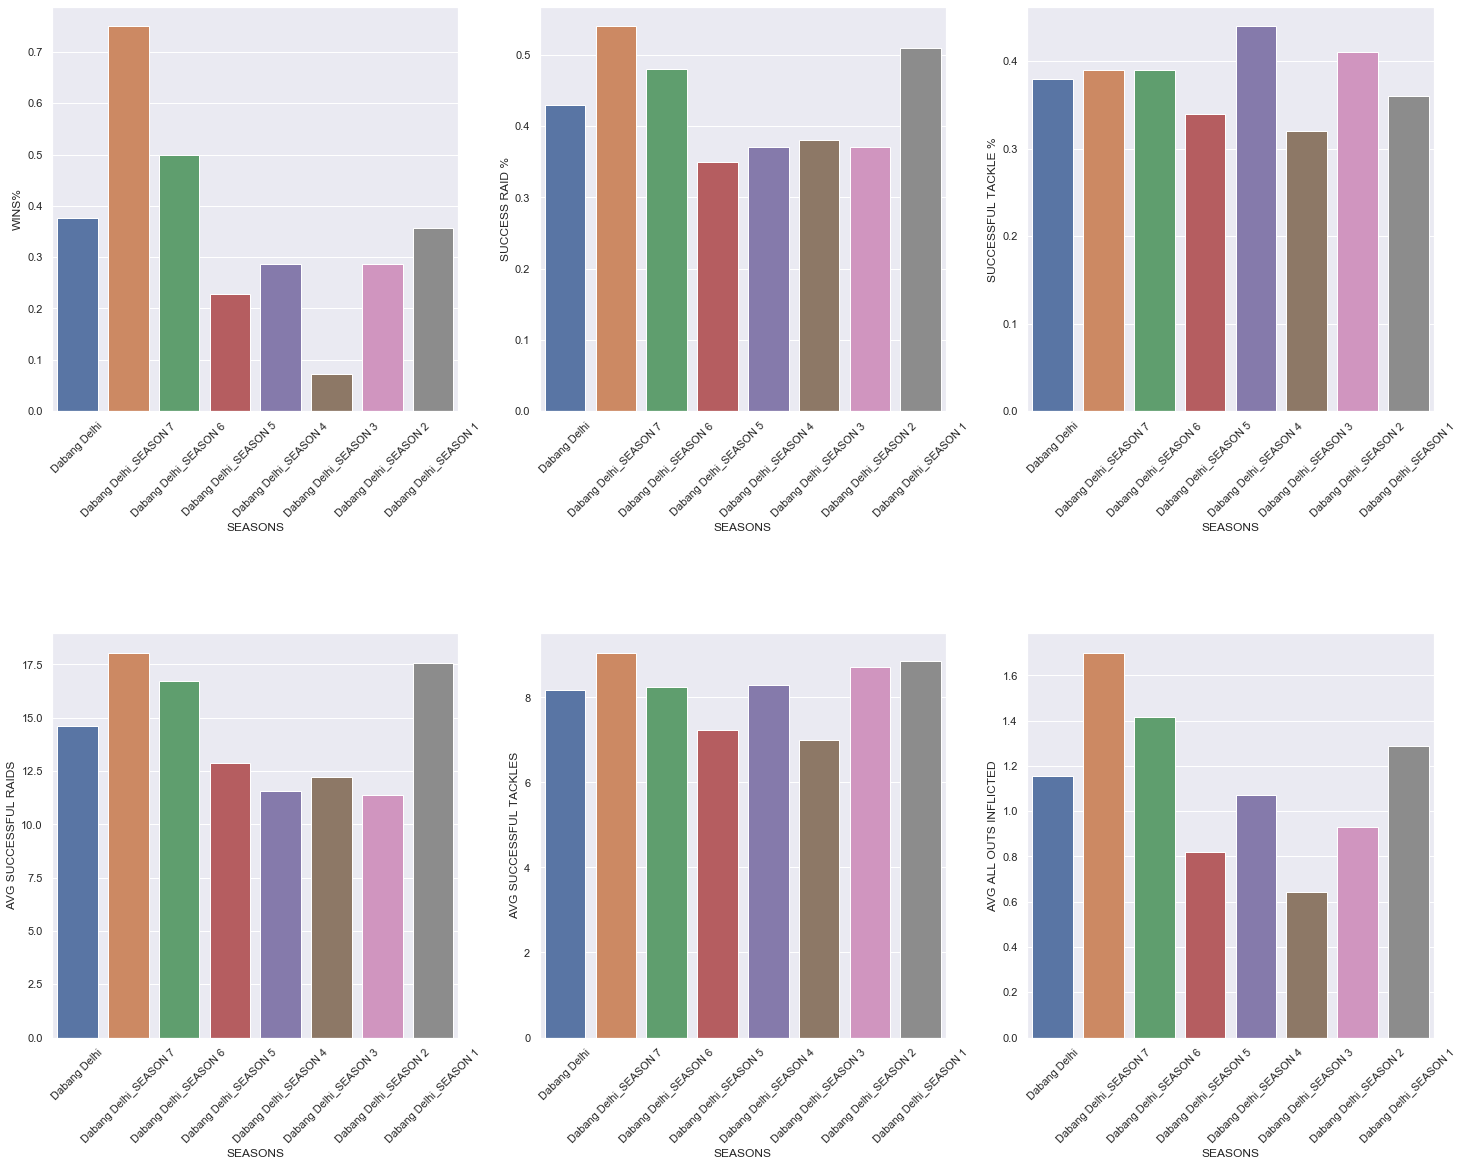

In [22]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Delhi_Dabangs,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Delhi_Dabangs,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Delhi_Dabangs,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Delhi_Dabangs,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Delhi_Dabangs,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Delhi_Dabangs,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Gujrat_Fortunegiants

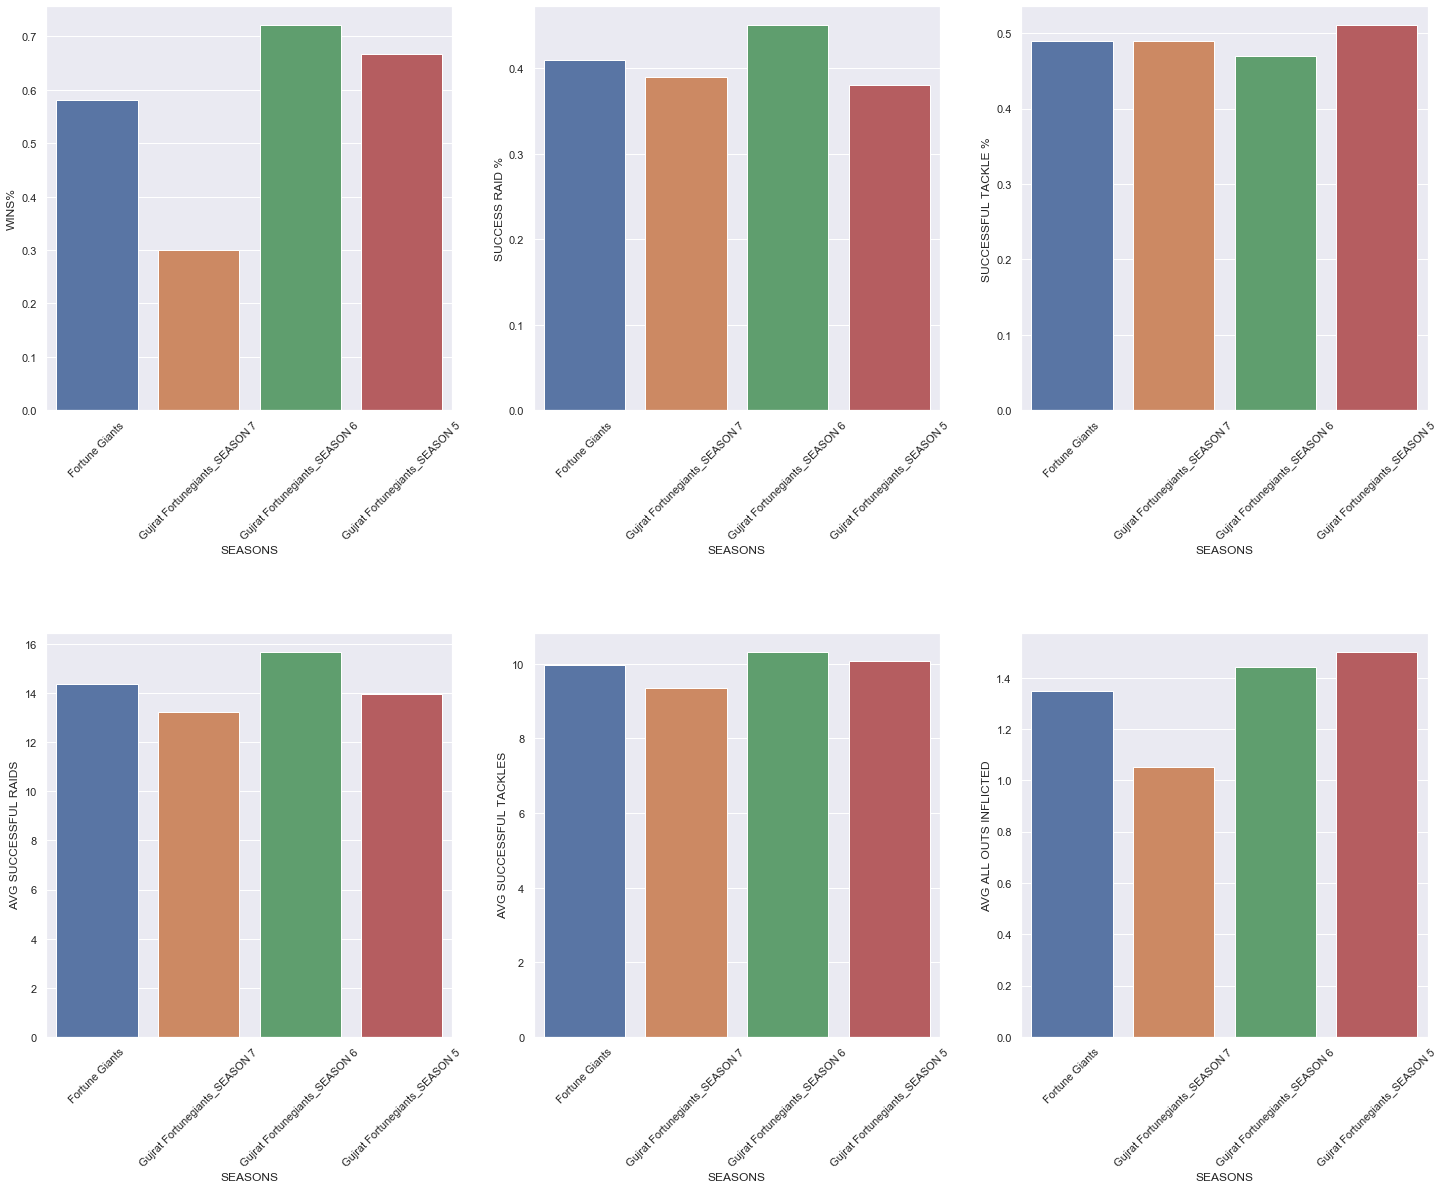

In [23]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Gujrat_Fortunegiants,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Gujrat_Fortunegiants,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Gujrat_Fortunegiants,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Gujrat_Fortunegiants,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Gujrat_Fortunegiants,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Gujrat_Fortunegiants,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Haryana_Steelers

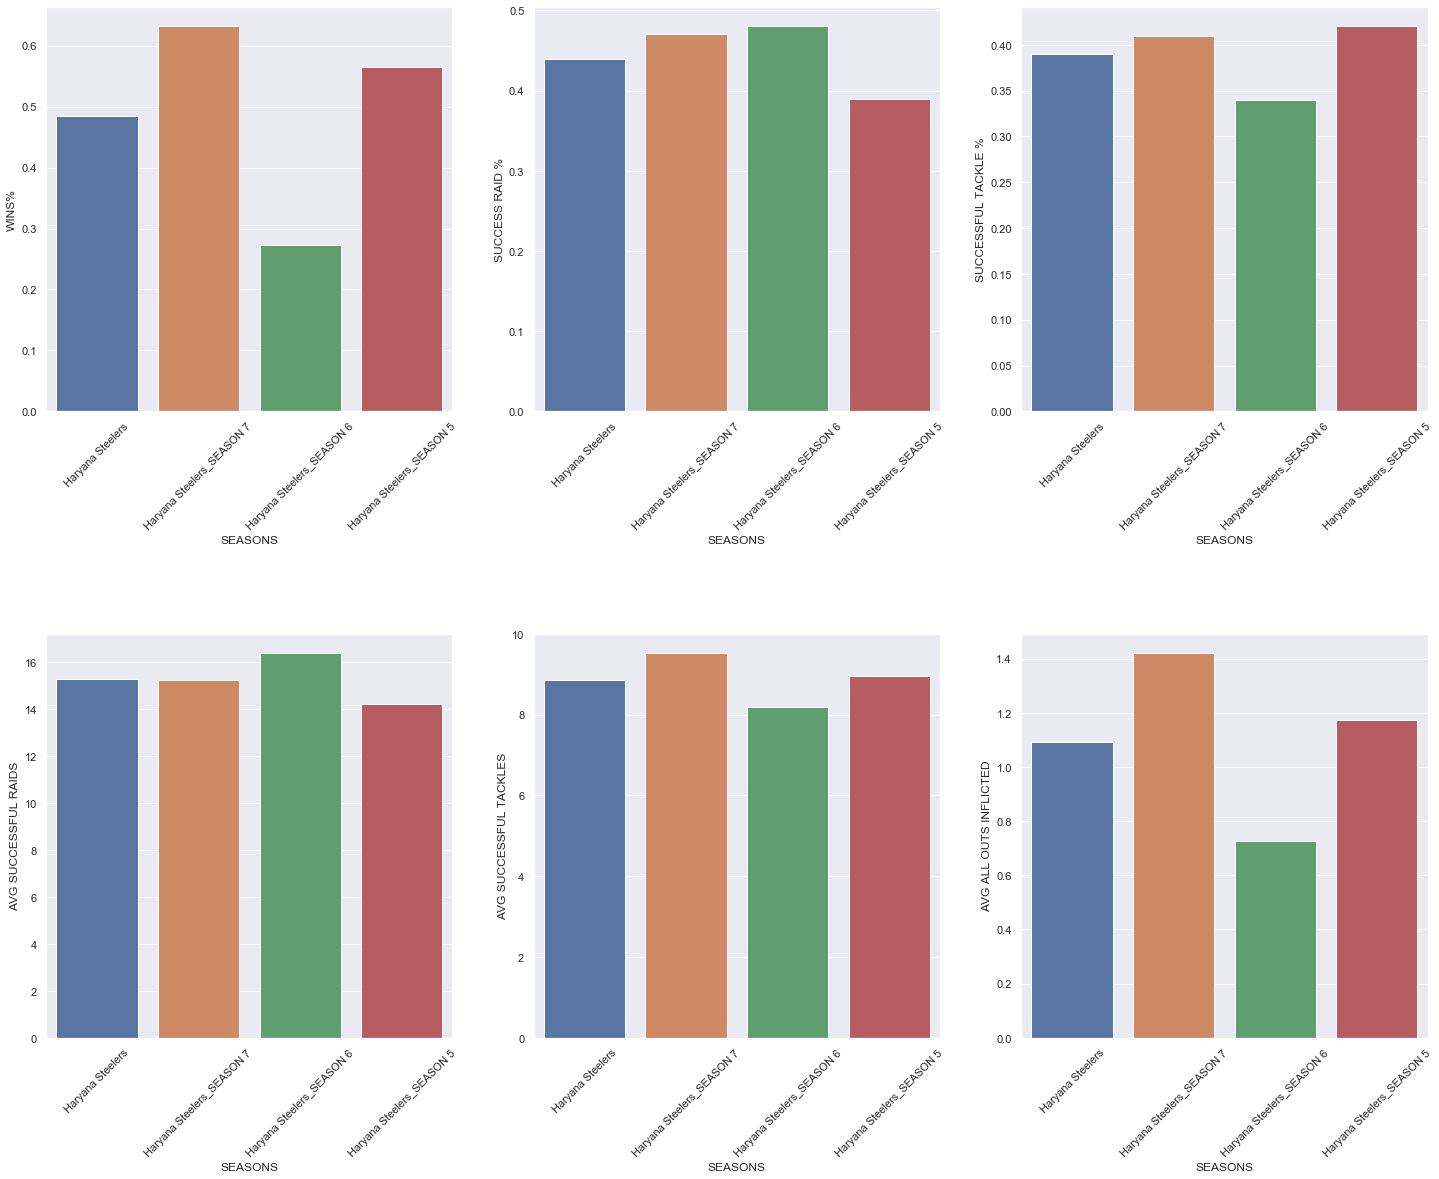

In [24]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Haryana_Steelers,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Haryana_Steelers,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Haryana_Steelers,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Haryana_Steelers,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Haryana_Steelers,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Haryana_Steelers,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Jaipur_Pink_Panthers

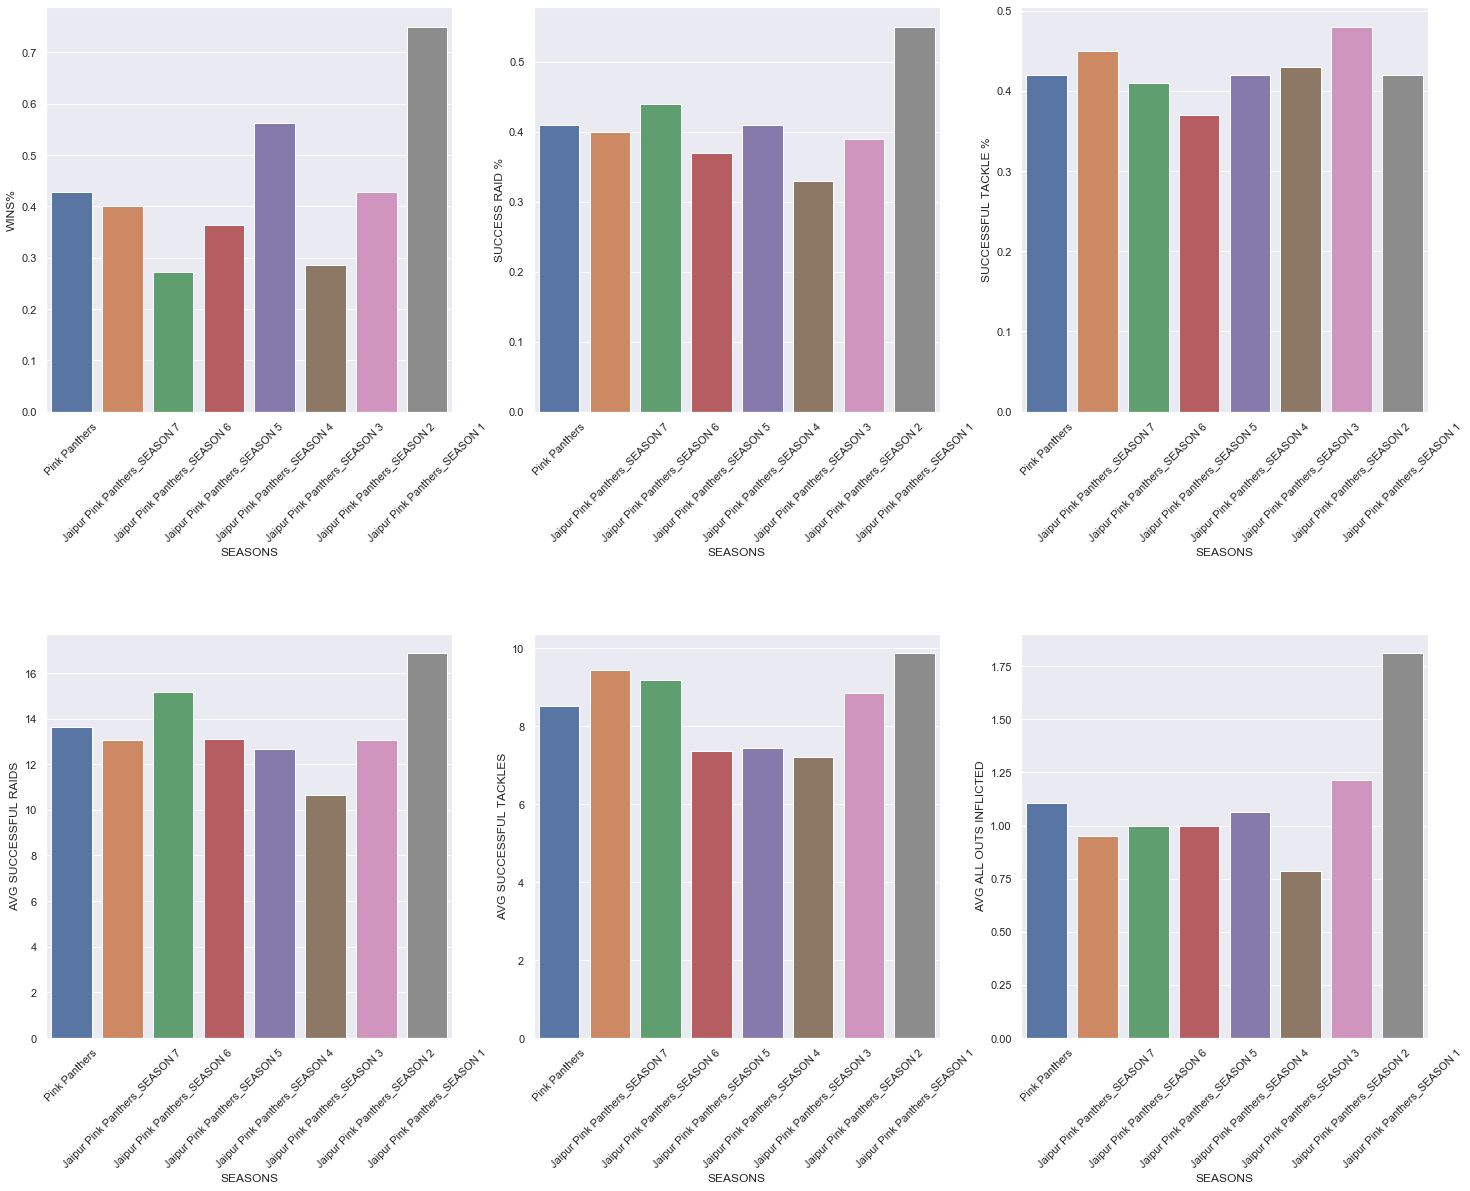

In [25]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Jaipur_Pink_Panthers,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Jaipur_Pink_Panthers,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Jaipur_Pink_Panthers,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Jaipur_Pink_Panthers,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Jaipur_Pink_Panthers,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Jaipur_Pink_Panthers,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Patna_Pirates

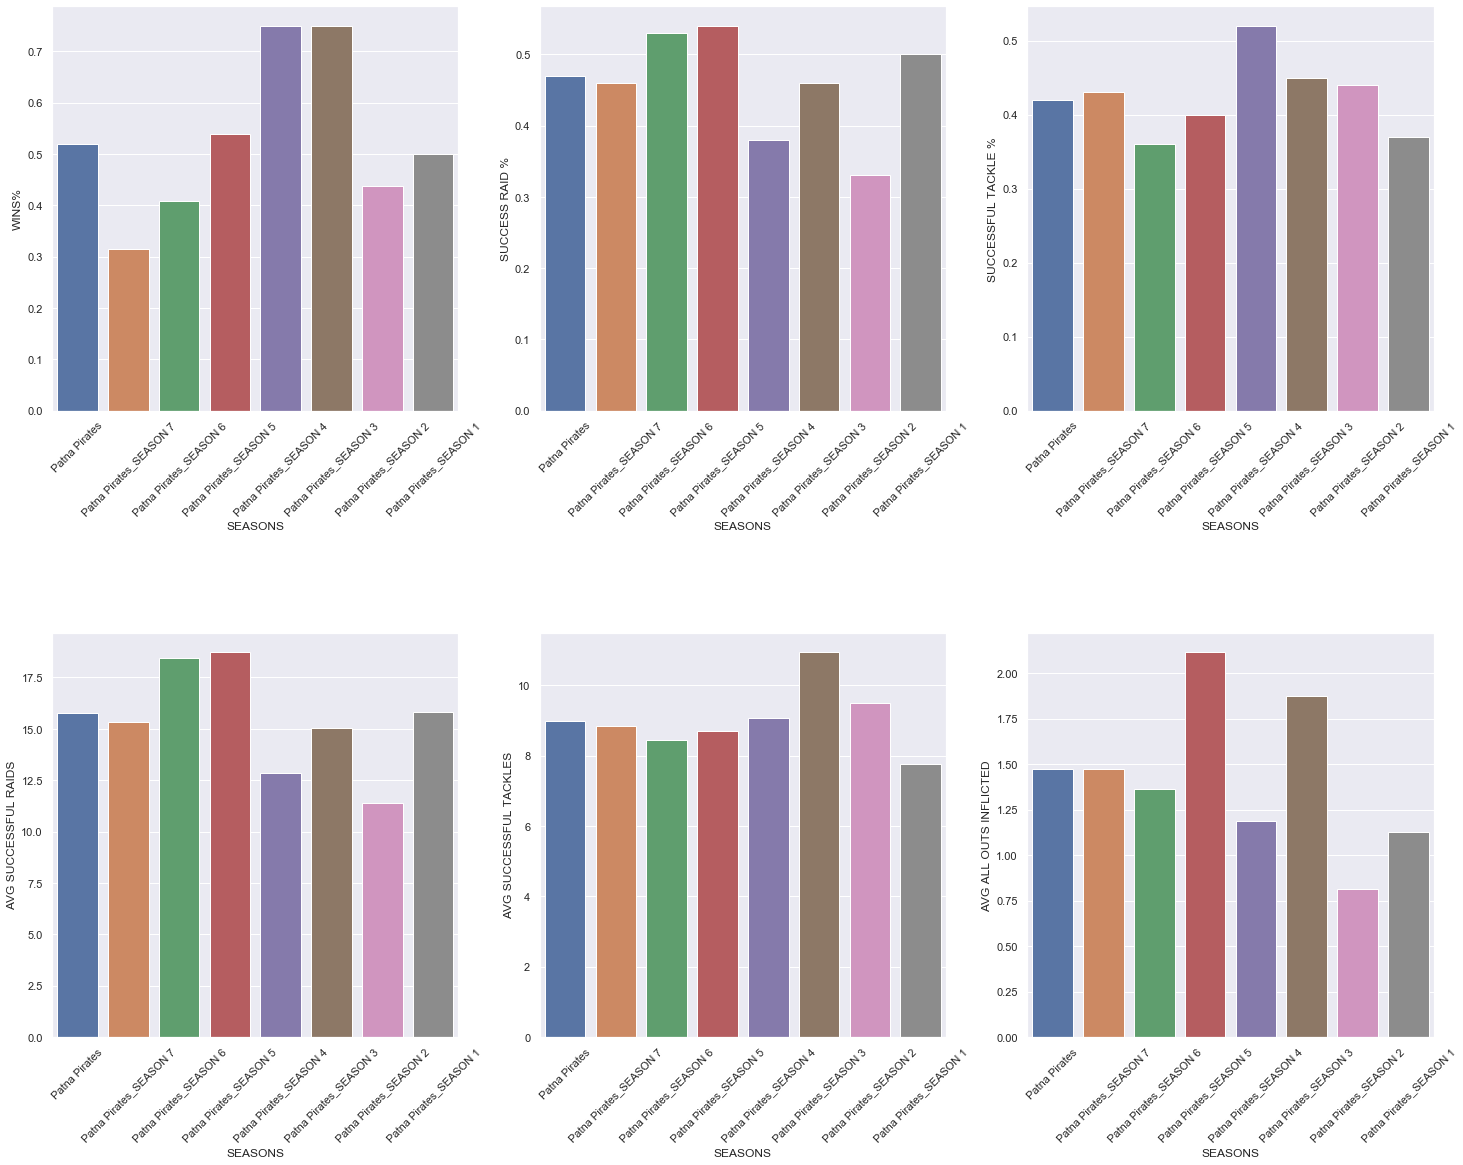

In [26]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Patna_Pirates,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Patna_Pirates,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Patna_Pirates,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Patna_Pirates,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Patna_Pirates,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Patna_Pirates,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Puneri_Paltan

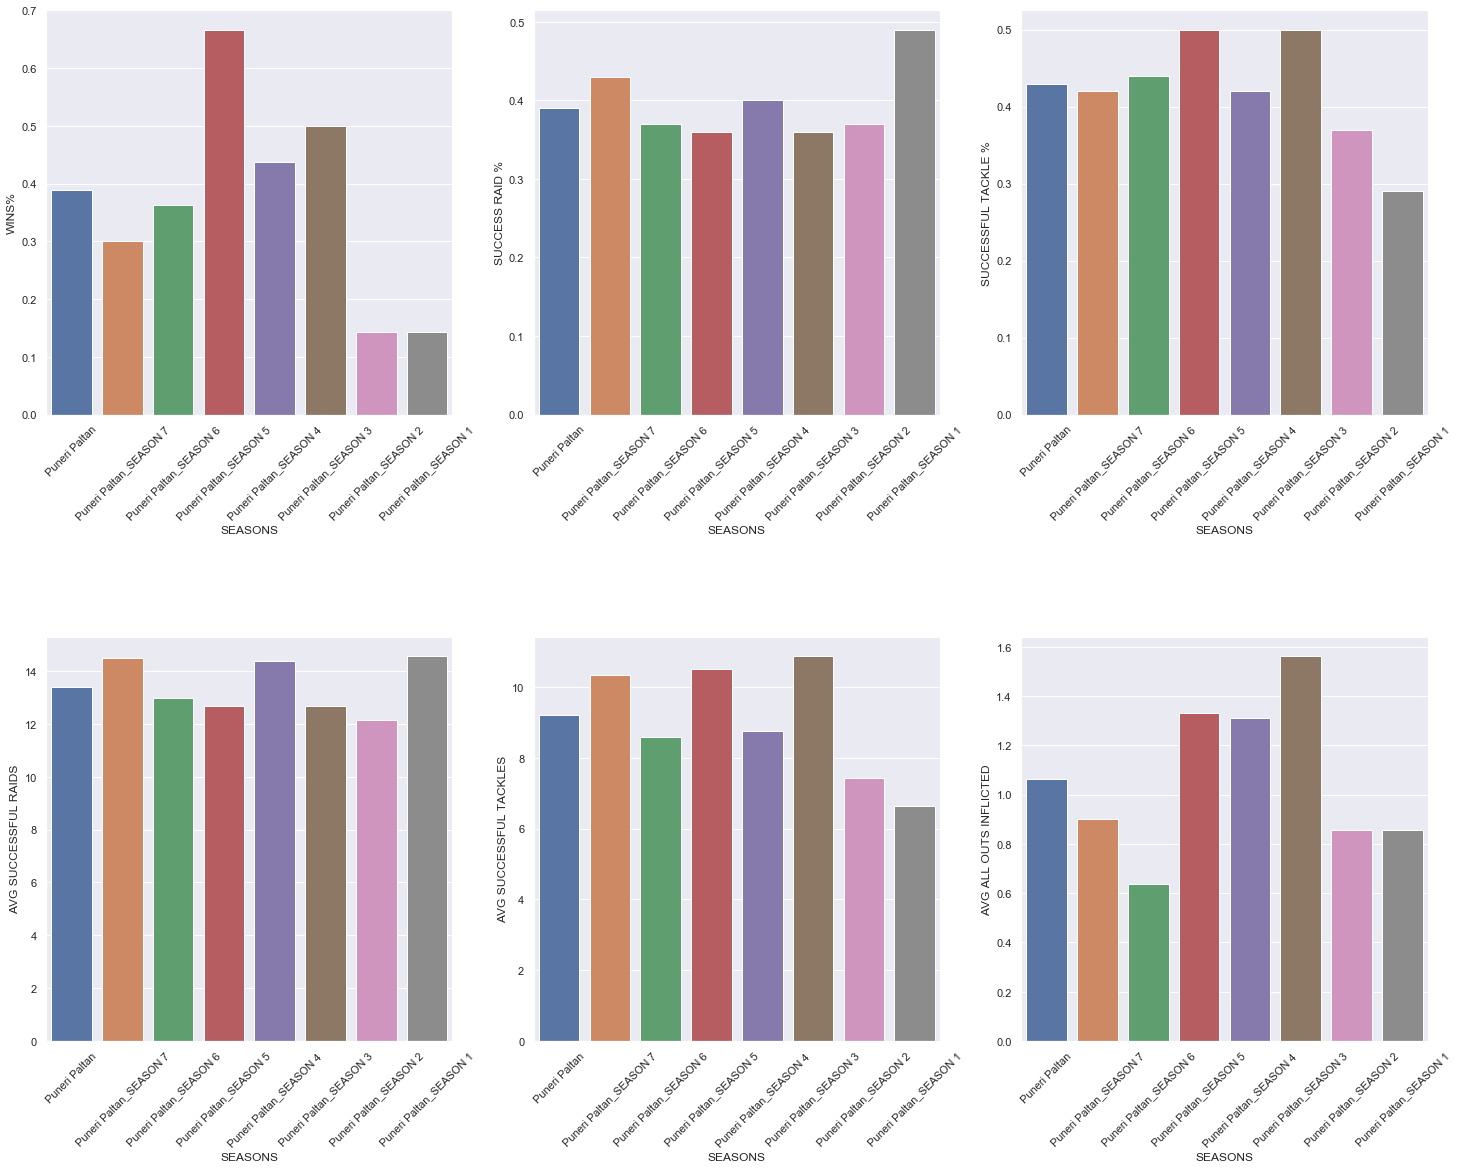

In [27]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Puneri_Paltan,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Puneri_Paltan,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Puneri_Paltan,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Puneri_Paltan,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Puneri_Paltan,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Puneri_Paltan,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Tamil_Thalaivas

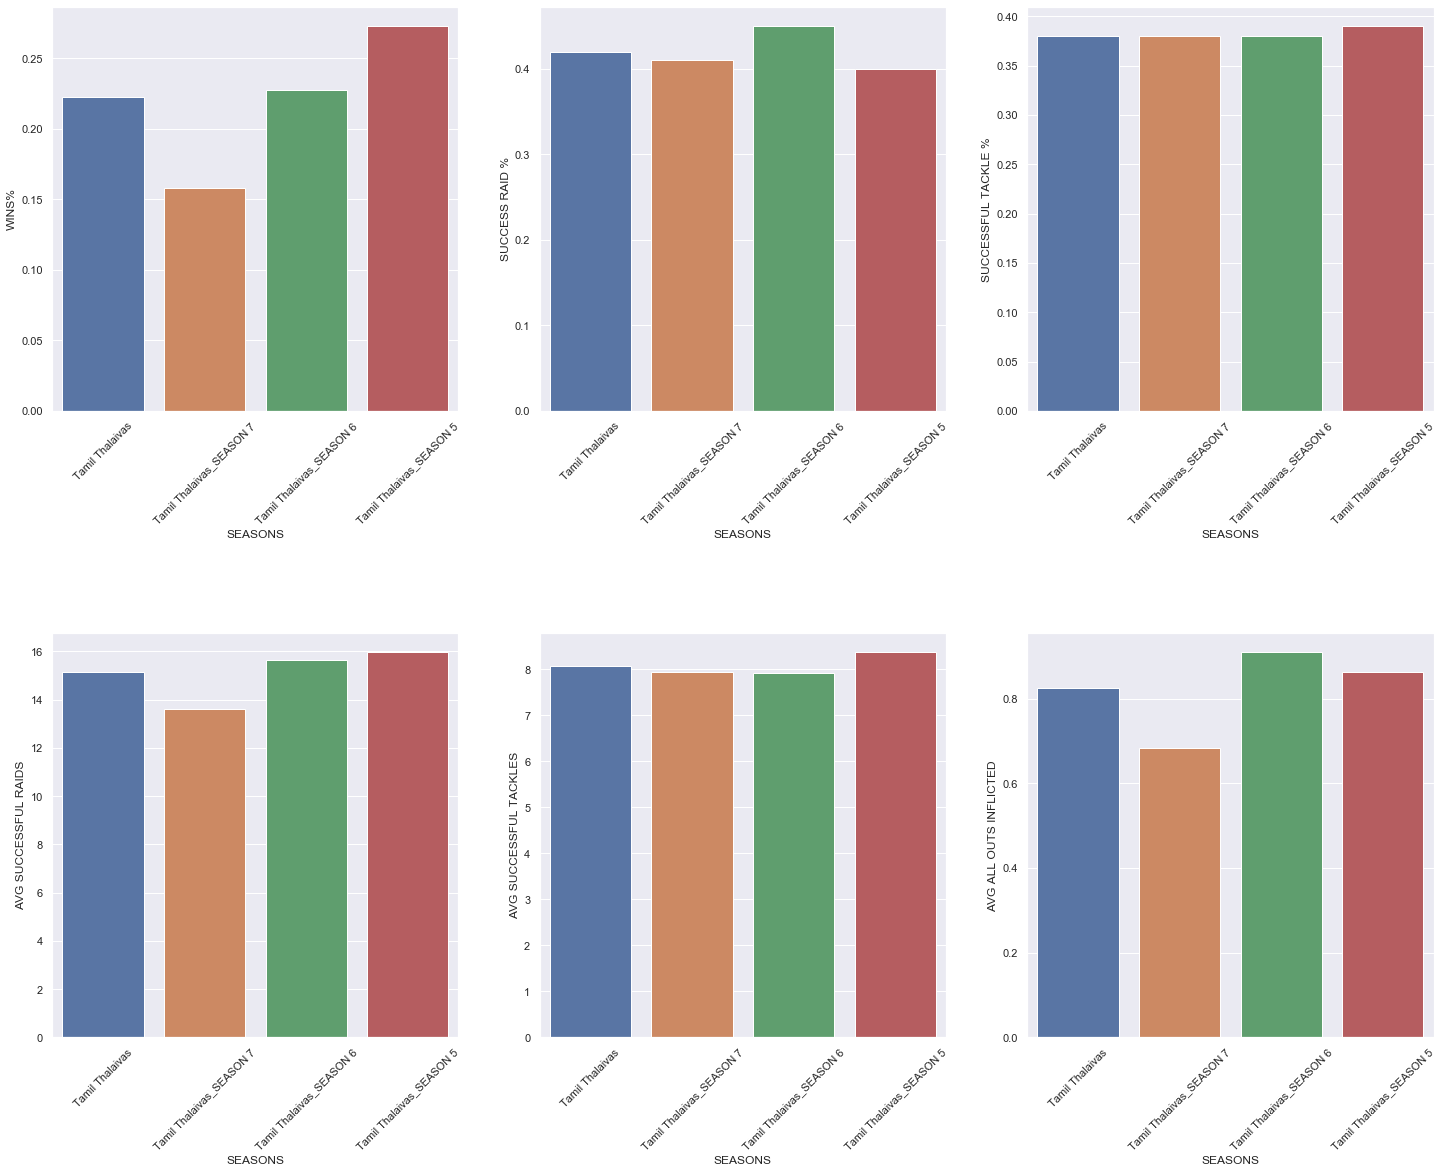

In [28]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Tamil_Thalaivas,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Tamil_Thalaivas,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Tamil_Thalaivas,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Tamil_Thalaivas,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Tamil_Thalaivas,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Tamil_Thalaivas,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Telugu_Titans

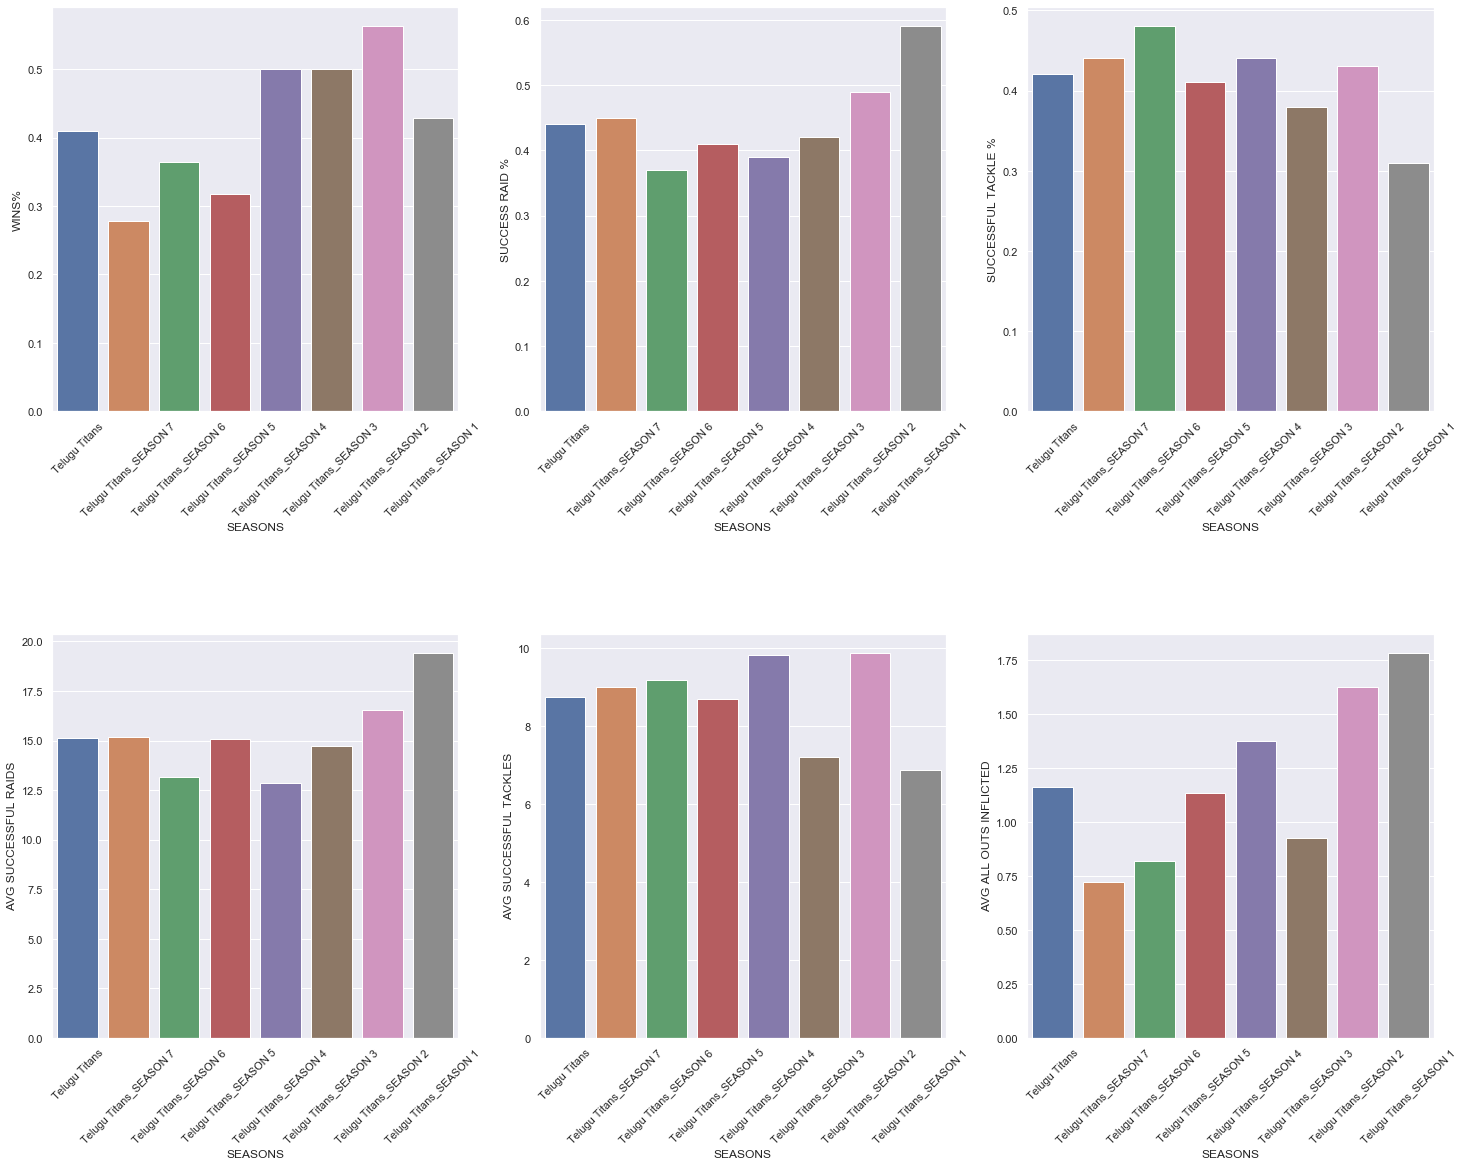

In [29]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_Telugu_Titans,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_Telugu_Titans,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_Telugu_Titans,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_Telugu_Titans,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_Telugu_Titans,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_Telugu_Titans,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### U_Mumba

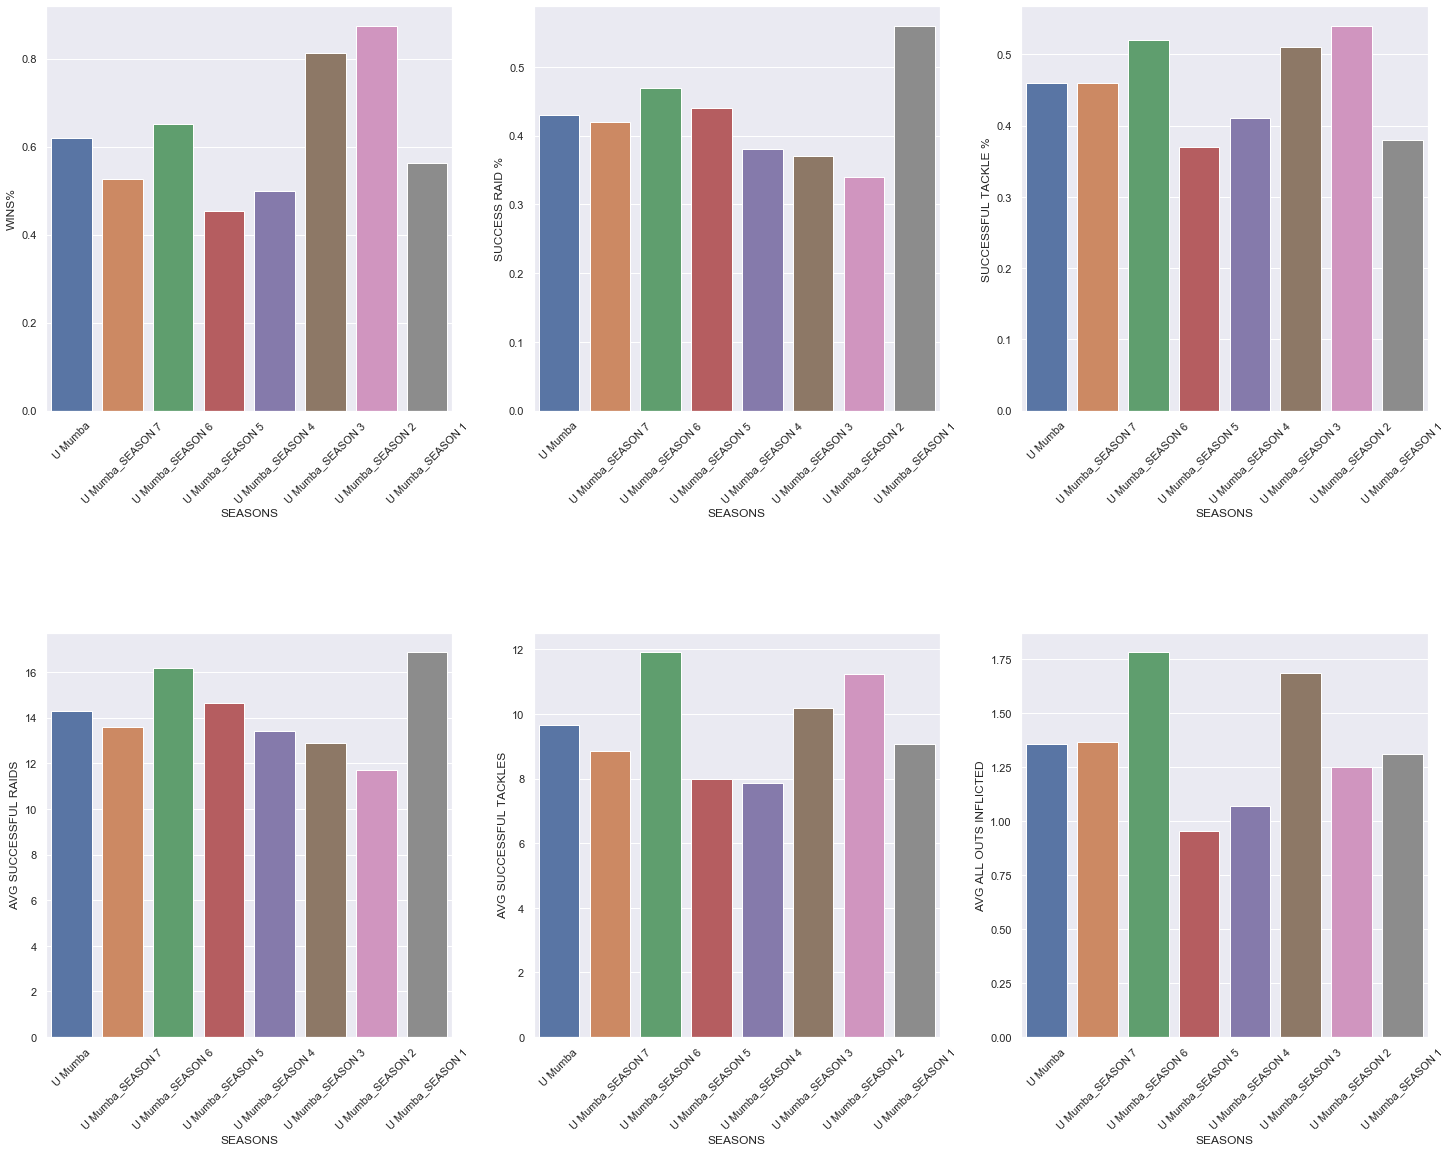

In [30]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_U_Mumba,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_U_Mumba,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_U_Mumba,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_U_Mumba,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_U_Mumba,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_U_Mumba,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### UP_Yoddha

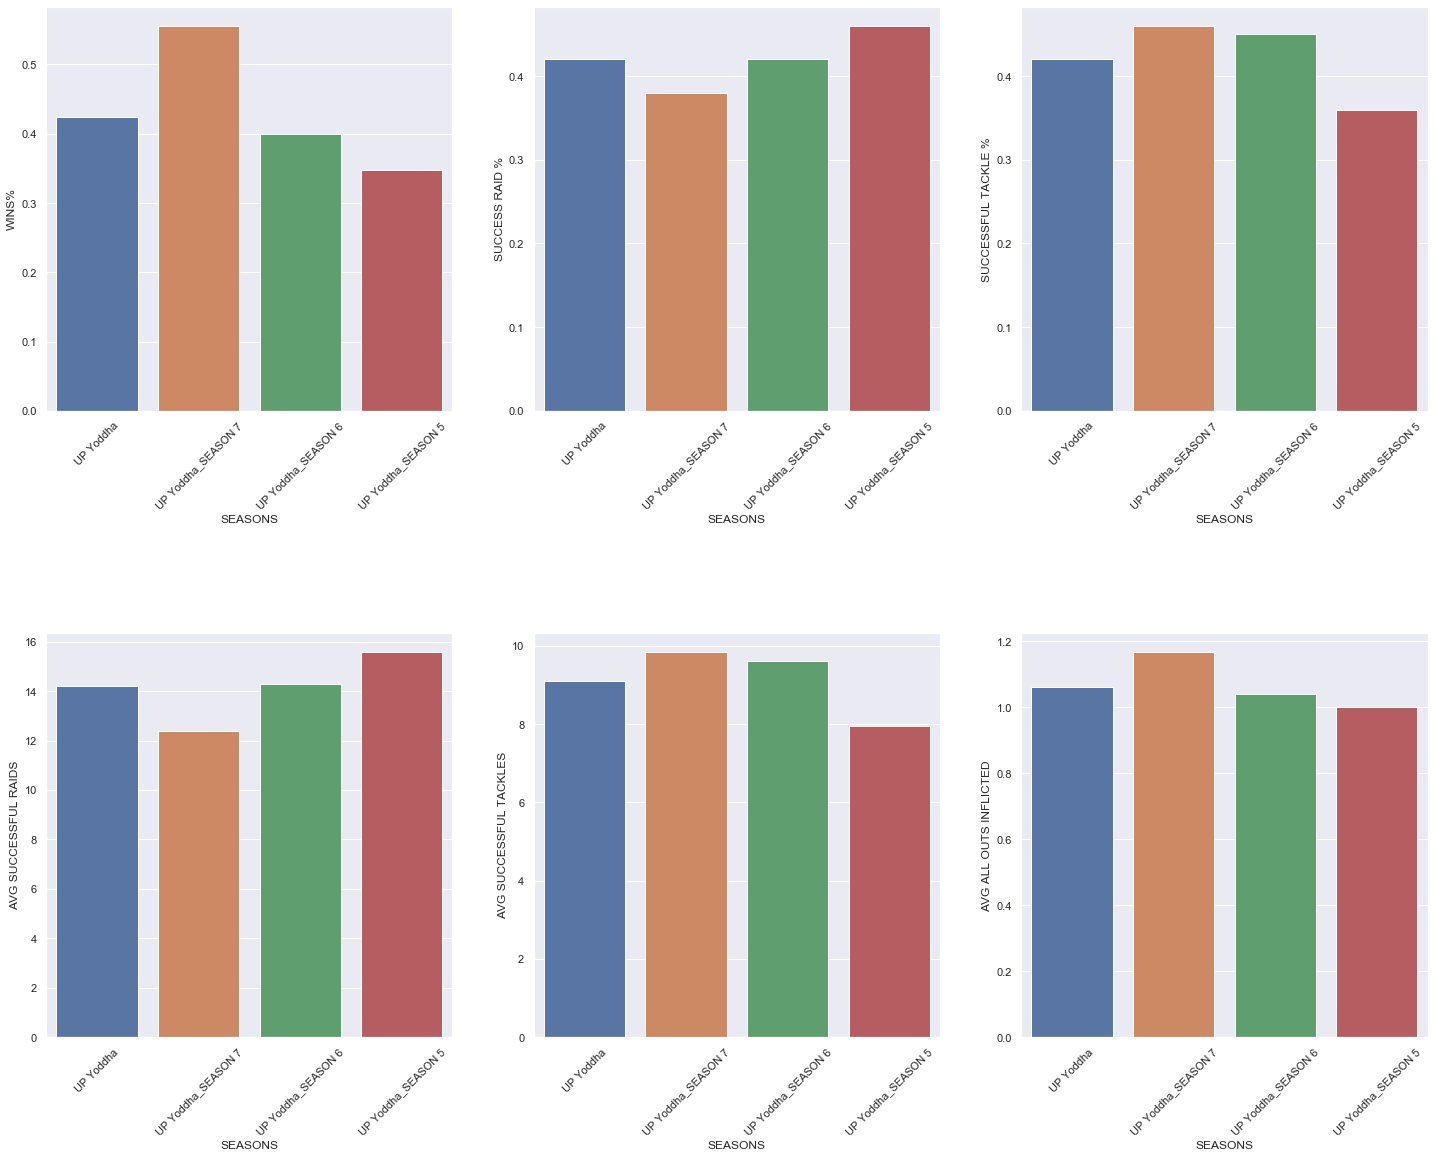

In [31]:
fig, axes = plt.subplots(2,3, figsize=(20,15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'SEASONS', y = 'WINS%', data = df_UP_Yoddha,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'SUCCESS RAID %', data = df_UP_Yoddha,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'SUCCESSFUL TACKLE %', data = df_UP_Yoddha,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL RAIDS', data = df_UP_Yoddha,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'SEASONS', y = 'AVG SUCCESSFUL TACKLES', data = df_UP_Yoddha,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'SEASONS', y = 'AVG ALL OUTS INFLICTED', data = df_UP_Yoddha,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Overall Analysis of teams for overall Seasons

In [32]:
df_teams_final = df_teams.iloc[[0,8,16,24,28,32,40,48,56,60,68,76],:]
df_teams_final = df_teams_final.rename(columns = {"SEASONS": "Team"})
df_teams_final.head()

,Team,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED
0,Bengal Warriors,125,56,15,54,2.7000,5310,1786,1149,2375,0.4200,70,1749,487,2236,2835,1025,1810,0.3900,98,133,266,1118,nan,0.4480,0.1200,0.4320,8.2000,14.2880,1.0640,nan
8,Bengaluru Bulls,125,58,8,59,3.7000,5327,1810,1245,2272,0.4300,63,1811,475,2286,2740,1086,1654,0.4300,93,152,298,1172,nan,0.4640,0.0640,0.4720,8.6880,14.4800,1.2160,nan
16,Dabang Delhi,122,46,9,67,3.2000,5159,1783,1171,2205,0.4300,62,1698,527,2225,2891,998,1893,0.3800,96,141,282,1087,nan,0.3770,0.0738,0.5492,8.1803,14.6148,1.1557,nan
24,Fortune Giants,69,40,7,22,6.6000,2948,992,677,1279,0.4100,26,986,219,1205,1500,687,813,0.4900,47,93,186,731,nan,0.5797,0.1014,0.3188,9.9565,14.3768,1.3478,nan
28,Haryana Steelers,64,31,7,26,3.6000,2770,978,610,1182,0.4400,38,936,292,1228,1581,567,1014,0.3900,50,70,140,615,nan,0.4844,0.1094,0.4062,8.8594,15.2812,1.0938,nan


#### Plot to visualise Team vs other variables

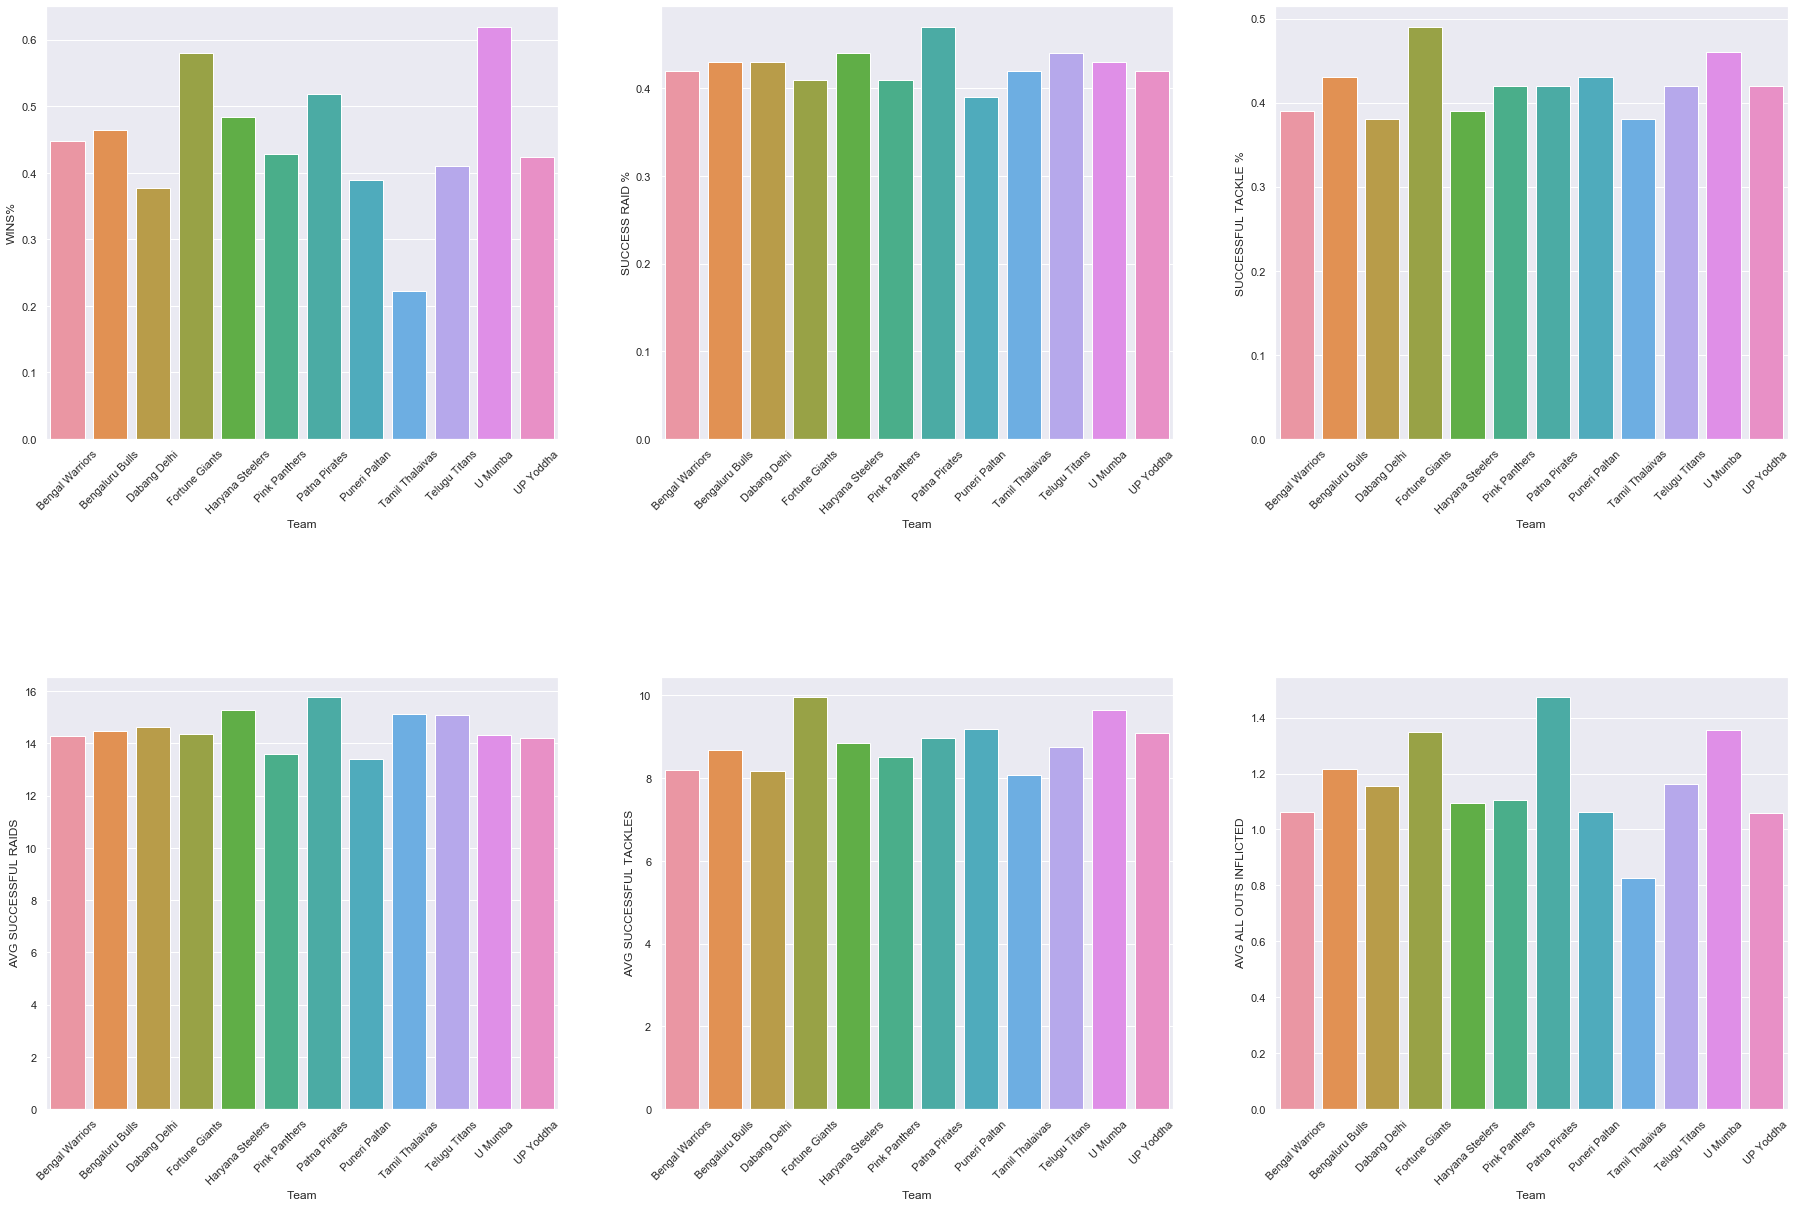

In [33]:
fig, axes = plt.subplots(2,3, figsize=(25,16))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.55)

a=sns.barplot(x = 'Team', y = 'WINS%', data = df_teams_final,ax=axes[0][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'Team', y = 'SUCCESS RAID %', data = df_teams_final,ax=axes[0][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'Team', y = 'SUCCESSFUL TACKLE %', data = df_teams_final,ax=axes[0][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)
a=sns.barplot(x = 'Team', y = 'AVG SUCCESSFUL RAIDS', data = df_teams_final,ax=axes[1][0]) 
b=plt.setp(a.get_xticklabels(), rotation=45)
a1=sns.barplot(x = 'Team', y = 'AVG SUCCESSFUL TACKLES', data = df_teams_final,ax=axes[1][1])
b1=plt.setp(a1.get_xticklabels(), rotation=45)
a2=sns.barplot(x = 'Team', y = 'AVG ALL OUTS INFLICTED', data = df_teams_final,ax=axes[1][2])
b2=plt.setp(a2.get_xticklabels(), rotation=45)

### Heatmap for better visualization

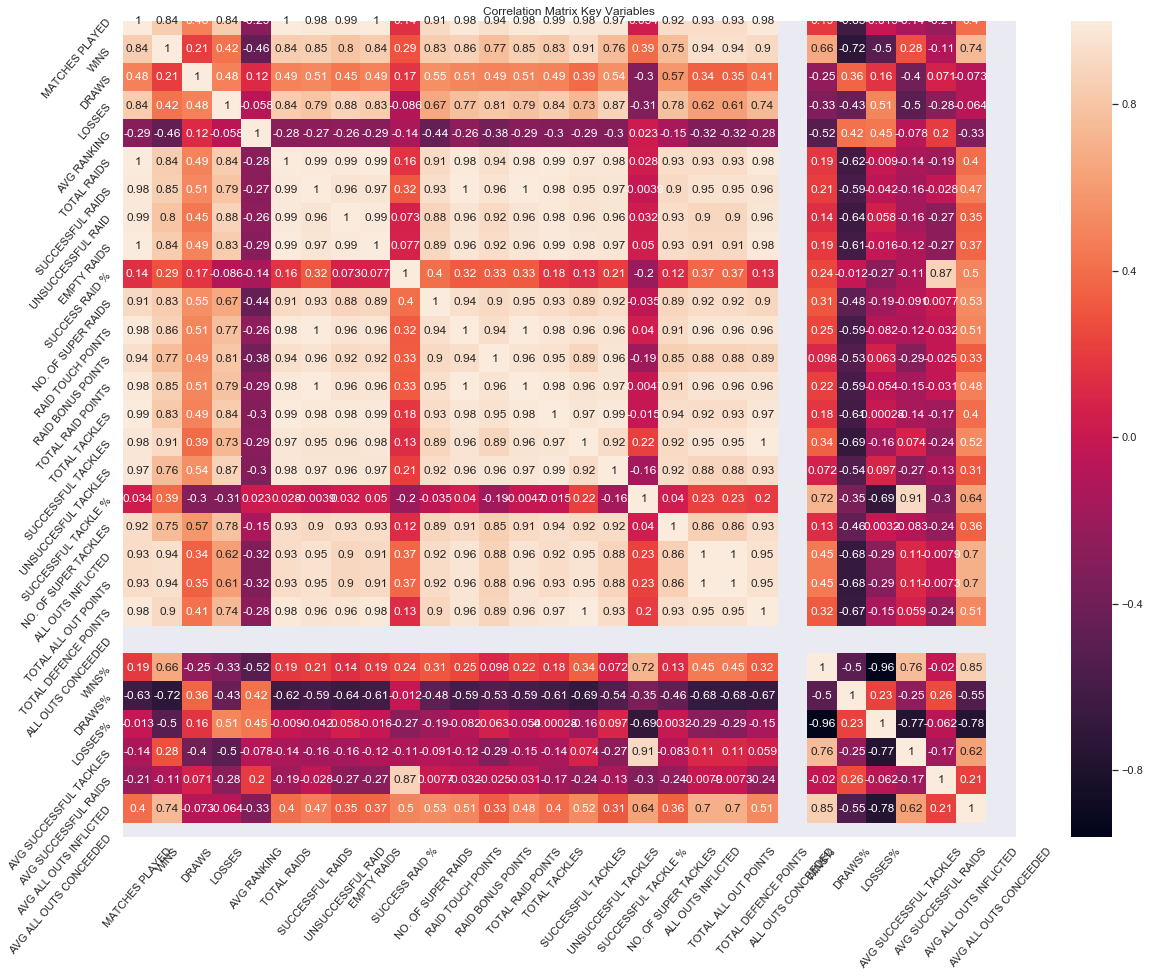

In [34]:
#Correlation of df_teams_final dataframe

plt.rcParams['figure.figsize'] = [20,15]
df_corr = df_teams_final.corr()
ax = sns.heatmap(df_corr,annot=True)

plt.setp(ax.get_xticklabels(), rotation=50)
plt.setp(ax.get_yticklabels(), rotation=50)
ax.title.set_text('Correlation Matrix Key Variables')

### Plots to understand relation among variables Team wise

#### SUCCESSFUL TACKLE % vs WINS%

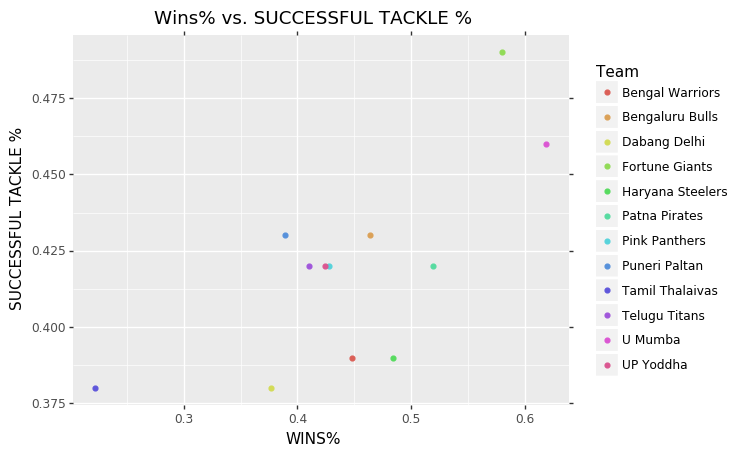

<ggplot: (-9223371876500691105)>

In [35]:
(ggplot(df_teams_final)
 + aes(x='WINS%', y='SUCCESSFUL TACKLE %',color='Team' )
 + geom_point()
 + labs(title='Wins% vs. SUCCESSFUL TACKLE %', x='WINS%', y='SUCCESSFUL TACKLE %')
)

#### SUCCESS RAID % vs 'WINS%

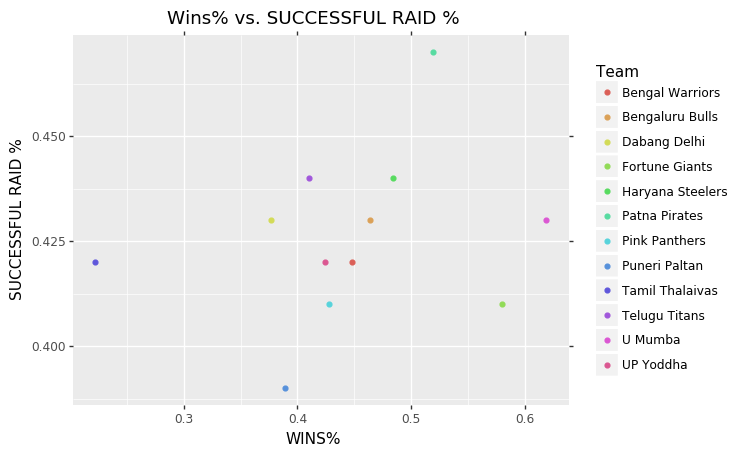

<ggplot: (-9223371876502040148)>

In [36]:
(ggplot(df_teams_final)
 + aes(x='WINS%', y='SUCCESS RAID %',color='Team' )
 + geom_point()
 + labs(title='Wins% vs. SUCCESSFUL RAID %', x='WINS%', y='SUCCESSFUL RAID %')
)

#### AVG SUCCESSFUL RAIDS vs WINS%

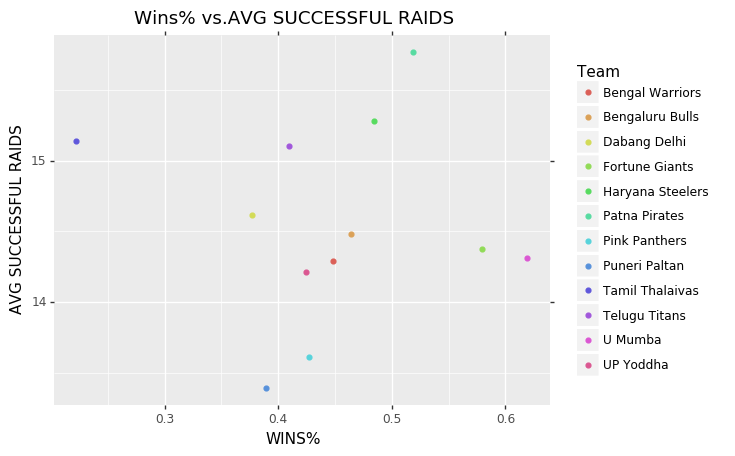

<ggplot: (160353821865)>

In [37]:
(ggplot(df_teams_final)
 + aes(x='WINS%', y='AVG SUCCESSFUL RAIDS',color='Team' )
 + geom_point()
 + labs(title='Wins% vs.AVG SUCCESSFUL RAIDS', x='WINS%', y='AVG SUCCESSFUL RAIDS')
)

#### AVG SUCCESSFUL TACKLES vs WINS%

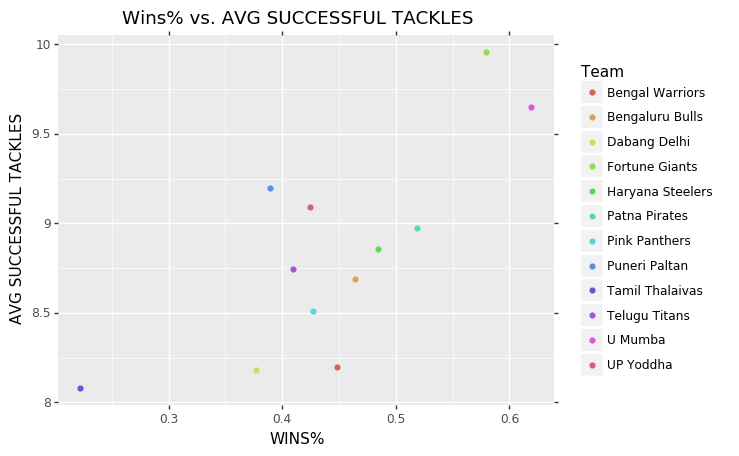

<ggplot: (-9223371876501110293)>

In [38]:
(ggplot(df_teams_final)
 + aes(x='WINS%', y='AVG SUCCESSFUL TACKLES',color='Team' )
 + geom_point()
 + labs(title='Wins% vs. AVG SUCCESSFUL TACKLES', x='WINS%', y='AVG SUCCESSFUL TACKLES')
)

#### AVG ALL OUTS INFLICTED vs WINS%

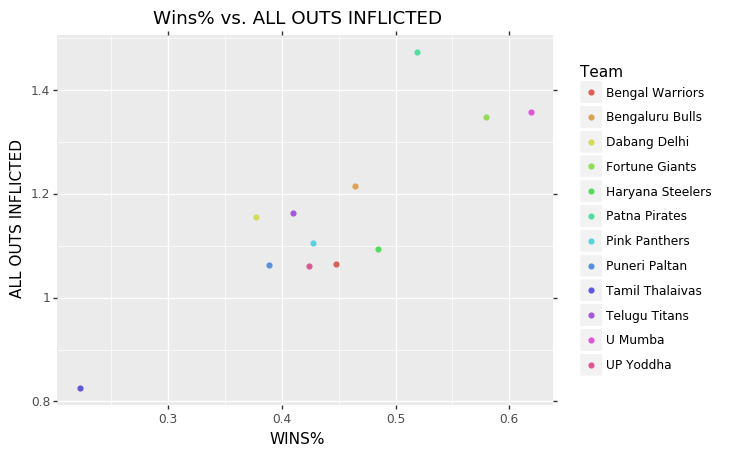

<ggplot: (-9223371876501041397)>

In [39]:
(ggplot(df_teams_final)
 + aes(x='WINS%', y='AVG ALL OUTS INFLICTED',color='Team' )
 + geom_point()
 + labs(title='Wins% vs. ALL OUTS INFLICTED', x='WINS%', y='ALL OUTS INFLICTED')
)

### Team Season 7 Analysis

In [40]:
df_teams_s7 = df_teams.iloc[[1,9,17,25,29,33,41,49,57,61,69,77],:]
df_teams_s7 = df_teams_s7.rename(columns = {"SEASONS": "Team"})
df_teams_S7 = df_teams_s7
df_teams_S7

,Team,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED
1,Bengal Warriors_SEASON 7,20,13,3,4,10.0000,823,340,159,324,0.5200,15,346,80,426,472,182,290,0.4100,12,34,68,192,17.0000,0.6500,0.1500,0.2000,9.1000,17.0000,1.7000,0.8500
9,Bengaluru Bulls_SEASON 7,19,10,1,8,20.0000,794,309,213,272,0.4900,8,295,98,393,438,168,270,0.4400,25,21,42,191,24.0000,0.5263,0.0526,0.4211,8.8421,16.2632,1.1053,1.2632
17,Dabang Delhi_SEASON 7,20,15,2,3,5.0000,812,361,161,290,0.5400,8,324,113,437,480,181,299,0.3900,8,34,68,187,18.0000,0.7500,0.1000,0.1500,9.0500,18.0500,1.7000,0.9000
25,Gujrat Fortunegiants_SEASON 7,20,6,2,12,63.0000,821,265,220,336,0.3900,5,255,65,320,417,187,230,0.4900,17,21,42,203,22.0000,0.3000,0.1000,0.6000,9.3500,13.2500,1.0500,1.1000
29,Haryana Steelers_SEASON 7,19,12,1,6,21.0000,799,290,174,335,0.4700,14,306,71,377,475,181,294,0.4100,14,27,54,195,21.0000,0.6316,0.0526,0.3158,9.5263,15.2632,1.4211,1.1053
33,Jaipur Pink Panthers_SEASON 7,20,8,2,10,35.0000,836,261,205,370,0.4000,7,246,91,337,483,189,294,0.4500,32,19,38,219,23.0000,0.4000,0.1000,0.5000,9.4500,13.0500,0.9500,1.1500
41,Patna Pirates_SEASON 7,19,6,1,12,40.0000,802,291,184,327,0.4600,13,298,70,368,448,168,280,0.4300,23,28,56,191,23.0000,0.3158,0.0526,0.6316,8.8421,15.3158,1.4737,1.2105
49,Puneri Paltan_SEASON 7,20,6,3,11,40.0000,831,290,214,327,0.4300,6,268,90,358,549,207,342,0.4200,25,18,36,232,33.0000,0.3000,0.1500,0.5500,10.3500,14.5000,0.9000,1.6500
57,Tamil Thalaivas_SEASON 7,19,3,3,13,84.0000,792,259,210,323,0.4100,4,249,77,326,431,151,280,0.3800,13,13,26,162,29.0000,0.1579,0.1579,0.6842,7.9474,13.6316,0.6842,1.5263
61,Telugu Titans_SEASON 7,18,5,3,10,55.0000,744,273,181,290,0.4500,9,238,94,332,413,162,251,0.4400,21,13,26,182,22.0000,0.2778,0.1667,0.5556,9.0000,15.1667,0.7222,1.2222


### Team wise Avg Successful Raids 

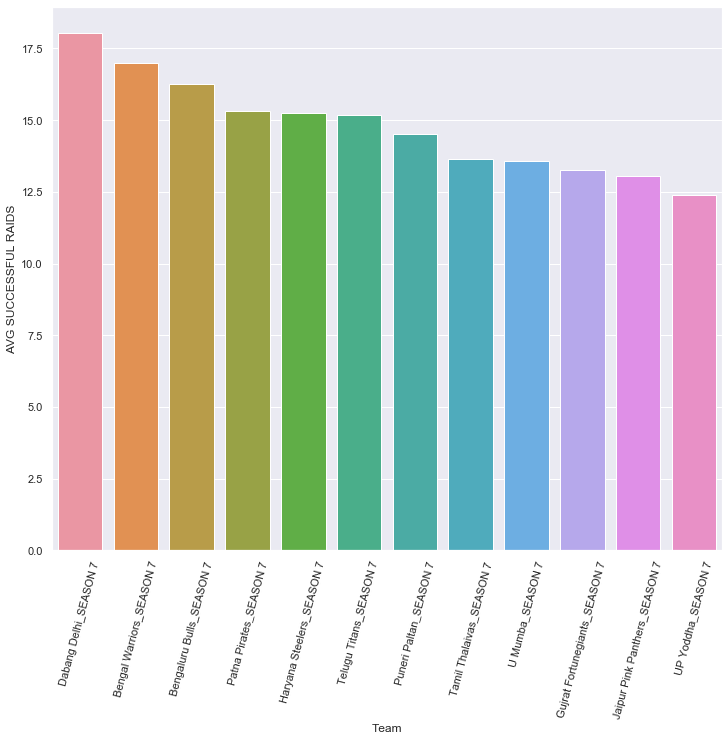

In [41]:
plt.rcParams['figure.figsize'] = [12,10]
df_teams_s7 = df_teams_s7.sort_values(by='AVG SUCCESSFUL RAIDS',ascending=False)
a=sns.barplot(x = 'Team', y = 'AVG SUCCESSFUL RAIDS', data = df_teams_s7) 
b=plt.setp(a.get_xticklabels(), rotation=75)

### Team wise Avg Successful Tackles

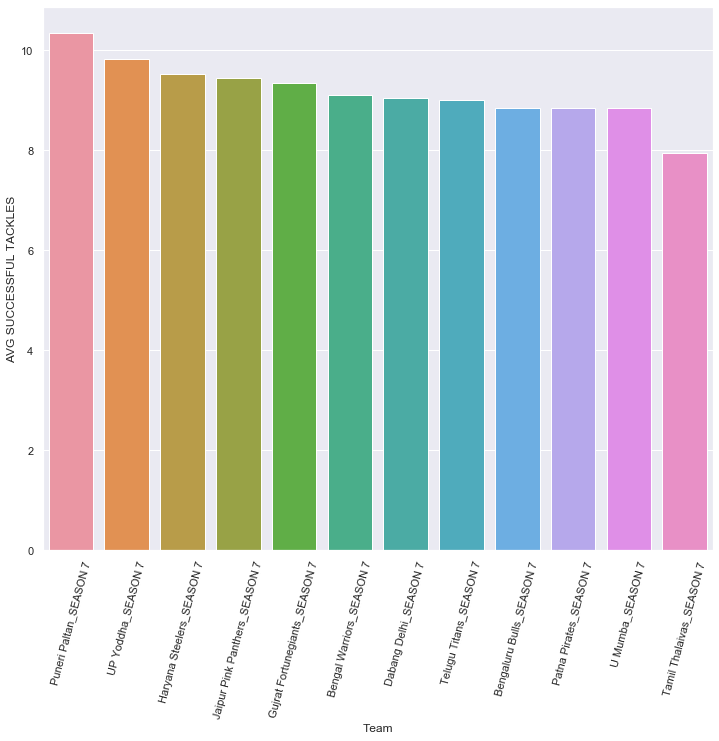

In [42]:
plt.rcParams['figure.figsize'] = [12,10]
df_teams_s7 = df_teams_s7.sort_values(by='AVG SUCCESSFUL TACKLES',ascending=False)
a=sns.barplot(x = 'Team', y = 'AVG SUCCESSFUL TACKLES', data = df_teams_s7) 
b=plt.setp(a.get_xticklabels(), rotation=75)

### Team wise Total Successful Raids

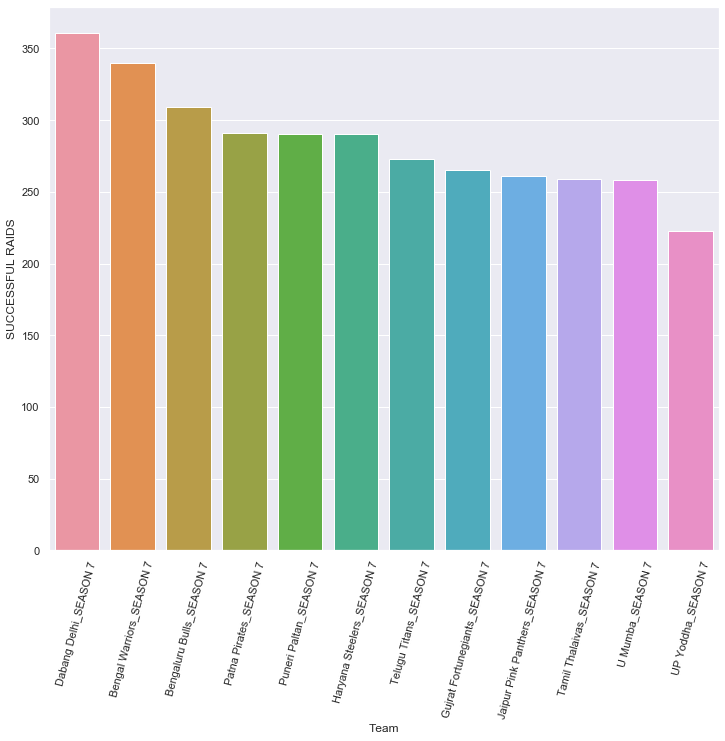

In [43]:
plt.rcParams['figure.figsize'] = [12,10]
df_teams_s7 = df_teams_s7.sort_values(by='SUCCESSFUL RAIDS',ascending=False)
a=sns.barplot(x = 'Team', y = 'SUCCESSFUL RAIDS', data = df_teams_s7) 
b=plt.setp(a.get_xticklabels(), rotation=75)

### Team wise Total Successful Tackles

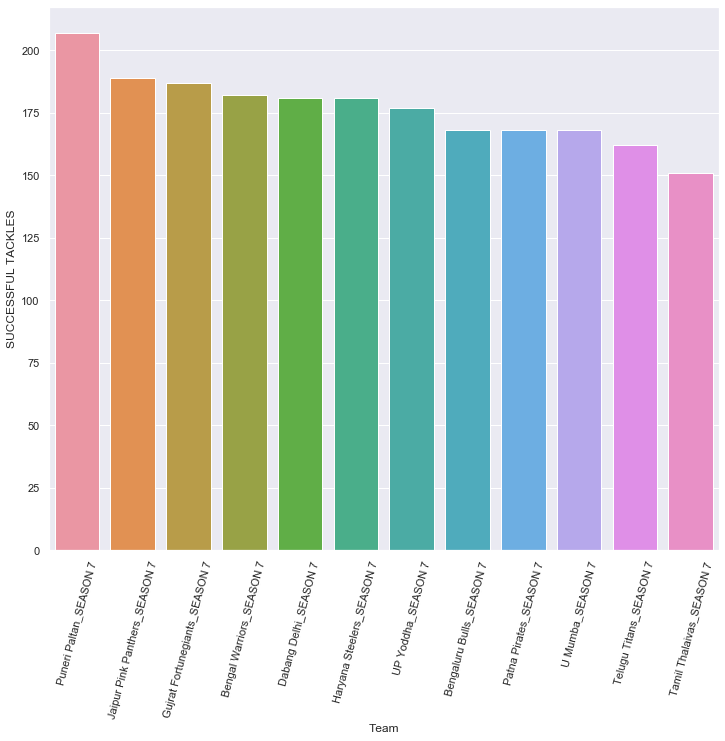

In [44]:
plt.rcParams['figure.figsize'] = [12,10]
df_teams_s7 = df_teams_s7.sort_values(by='SUCCESSFUL TACKLES',ascending=False)
a=sns.barplot(x = 'Team', y = 'SUCCESSFUL TACKLES', data = df_teams_s7) 
b=plt.setp(a.get_xticklabels(), rotation=75)

#### Prediction of Team with higher Successful Raids and Tackles
* From our Prediction stat we now know which teams will be playing finals and playoffs and hence count no.of matches left for a team to be played
* So, 
          Total Successful raids = Avg succ raid * Matches Played
          Total Successful tackles = Avg succ tackles * Matches Played

In [45]:
df_teams_raids = df_teams_S7[['Team','MATCHES PLAYED','AVG SUCCESSFUL RAIDS','SUCCESSFUL RAIDS']]
df_teams_raids = df_teams_raids.reset_index(drop=True)
df_teams_raids

,Team,MATCHES PLAYED,AVG SUCCESSFUL RAIDS,SUCCESSFUL RAIDS
0,Bengal Warriors_SEASON 7,20,17.0000,340
1,Bengaluru Bulls_SEASON 7,19,16.2632,309
2,Dabang Delhi_SEASON 7,20,18.0500,361
3,Gujrat Fortunegiants_SEASON 7,20,13.2500,265
4,Haryana Steelers_SEASON 7,19,15.2632,290
5,Jaipur Pink Panthers_SEASON 7,20,13.0500,261
6,Patna Pirates_SEASON 7,19,15.3158,291
7,Puneri Paltan_SEASON 7,20,14.5000,290
8,Tamil Thalaivas_SEASON 7,19,13.6316,259
9,Telugu Titans_SEASON 7,18,15.1667,273


In [46]:
# Add column with Name Matches to be played
df_teams_raids['TO BE PLAYED in Group'] = [2,3, 2, 2, 3, 3, 3, 2, 3, 4, 3, 4]

df_teams_raids['TO BE PLAYED in Playoffs'] = [2,1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2]


In [47]:
df_teams_raids['MATCHES PLAYED'] = df_teams_raids['MATCHES PLAYED'] + df_teams_raids['TO BE PLAYED in Group'] + df_teams_raids['TO BE PLAYED in Playoffs']

df_teams_raids['SUCCESSFUL RAIDS'] = df_teams_raids['AVG SUCCESSFUL RAIDS'] * df_teams_raids['MATCHES PLAYED']

In [48]:
df_teams_raids

,Team,MATCHES PLAYED,AVG SUCCESSFUL RAIDS,SUCCESSFUL RAIDS,TO BE PLAYED in Group,TO BE PLAYED in Playoffs
0,Bengal Warriors_SEASON 7,24,17.0000,408.0000,2,2
1,Bengaluru Bulls_SEASON 7,23,16.2632,374.0526,3,1
2,Dabang Delhi_SEASON 7,24,18.0500,433.2000,2,2
3,Gujrat Fortunegiants_SEASON 7,22,13.2500,291.5000,2,0
4,Haryana Steelers_SEASON 7,24,15.2632,366.3158,3,2
5,Jaipur Pink Panthers_SEASON 7,23,13.0500,300.1500,3,0
6,Patna Pirates_SEASON 7,22,15.3158,336.9474,3,0
7,Puneri Paltan_SEASON 7,22,14.5000,319.0000,2,0
8,Tamil Thalaivas_SEASON 7,22,13.6316,299.8947,3,0
9,Telugu Titans_SEASON 7,22,15.1667,333.6667,4,0


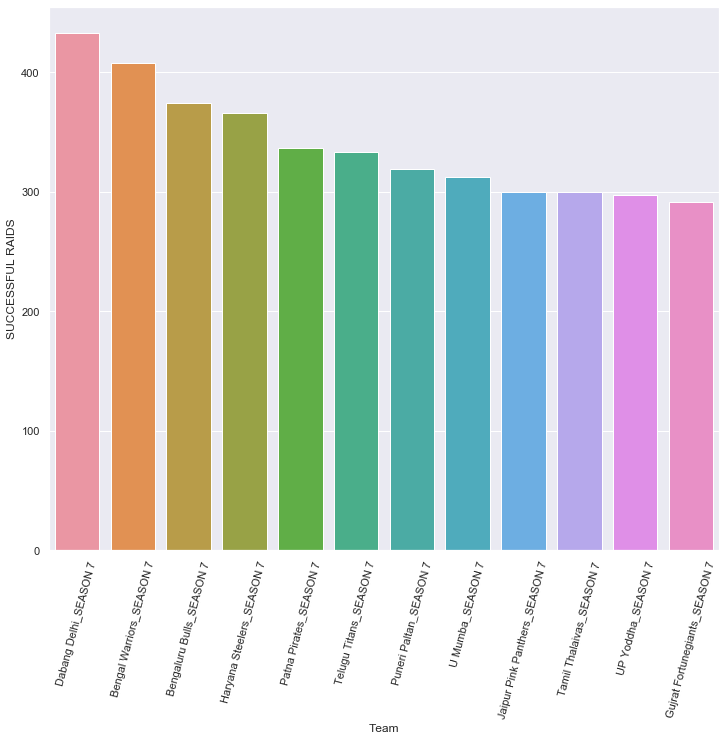

In [49]:
plt.rcParams['figure.figsize'] = [12,10]
df_teams_raids = df_teams_raids.sort_values(by='SUCCESSFUL RAIDS',ascending=False)
a=sns.barplot(x = 'Team', y = 'SUCCESSFUL RAIDS', data = df_teams_raids) 
b=plt.setp(a.get_xticklabels(), rotation=75)

#### Insights:
* Dabang Delhi will top the Successful Raid table

In [50]:
df_teams_tackles = df_teams_S7[['Team','MATCHES PLAYED','AVG SUCCESSFUL TACKLES','SUCCESSFUL TACKLES']]
df_teams_tackles = df_teams_tackles.reset_index(drop=True)
df_teams_tackles

,Team,MATCHES PLAYED,AVG SUCCESSFUL TACKLES,SUCCESSFUL TACKLES
0,Bengal Warriors_SEASON 7,20,9.1000,182
1,Bengaluru Bulls_SEASON 7,19,8.8421,168
2,Dabang Delhi_SEASON 7,20,9.0500,181
3,Gujrat Fortunegiants_SEASON 7,20,9.3500,187
4,Haryana Steelers_SEASON 7,19,9.5263,181
5,Jaipur Pink Panthers_SEASON 7,20,9.4500,189
6,Patna Pirates_SEASON 7,19,8.8421,168
7,Puneri Paltan_SEASON 7,20,10.3500,207
8,Tamil Thalaivas_SEASON 7,19,7.9474,151
9,Telugu Titans_SEASON 7,18,9.0000,162


In [51]:
# Add column with Name Matches to be played
df_teams_tackles['TO BE PLAYED in Group'] = [2,3, 2, 2, 3, 3, 3, 2, 3, 4, 3, 4]

df_teams_tackles['TO BE PLAYED in Playoffs'] = [2,1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2]


In [52]:
df_teams_tackles['MATCHES PLAYED'] = df_teams_tackles['MATCHES PLAYED'] + df_teams_tackles['TO BE PLAYED in Group'] + df_teams_tackles['TO BE PLAYED in Playoffs']

df_teams_tackles['SUCCESSFUL TACKLES'] = df_teams_tackles['AVG SUCCESSFUL TACKLES'] * df_teams_tackles['MATCHES PLAYED']
df_teams_tackles

,Team,MATCHES PLAYED,AVG SUCCESSFUL TACKLES,SUCCESSFUL TACKLES,TO BE PLAYED in Group,TO BE PLAYED in Playoffs
0,Bengal Warriors_SEASON 7,24,9.1000,218.4000,2,2
1,Bengaluru Bulls_SEASON 7,23,8.8421,203.3684,3,1
2,Dabang Delhi_SEASON 7,24,9.0500,217.2000,2,2
3,Gujrat Fortunegiants_SEASON 7,22,9.3500,205.7000,2,0
4,Haryana Steelers_SEASON 7,24,9.5263,228.6316,3,2
5,Jaipur Pink Panthers_SEASON 7,23,9.4500,217.3500,3,0
6,Patna Pirates_SEASON 7,22,8.8421,194.5263,3,0
7,Puneri Paltan_SEASON 7,22,10.3500,227.7000,2,0
8,Tamil Thalaivas_SEASON 7,22,7.9474,174.8421,3,0
9,Telugu Titans_SEASON 7,22,9.0000,198.0000,4,0


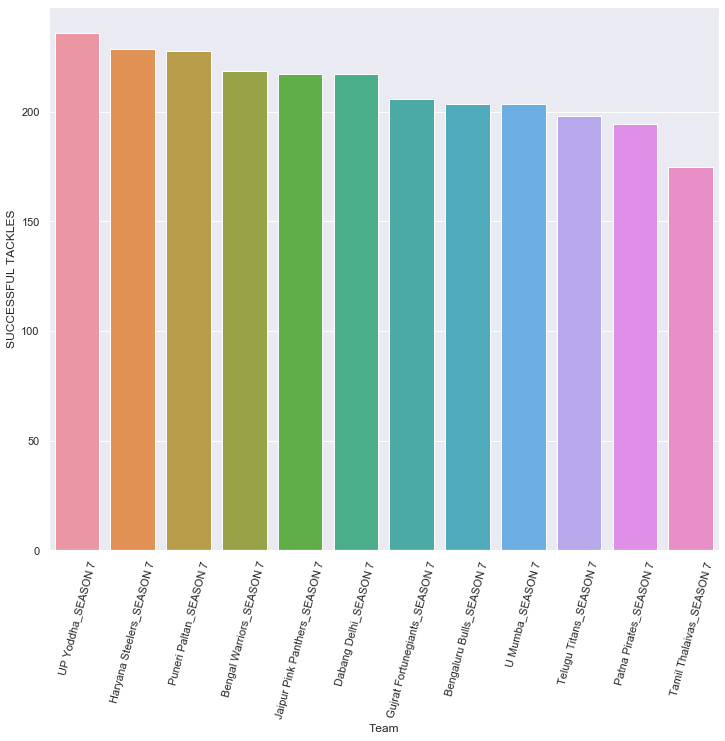

In [53]:
plt.rcParams['figure.figsize'] = [12,10]
df_teams_tackles = df_teams_tackles.sort_values(by='SUCCESSFUL TACKLES',ascending=False)
a=sns.barplot(x = 'Team', y = 'SUCCESSFUL TACKLES', data = df_teams_tackles) 
b=plt.setp(a.get_xticklabels(), rotation=75)

#### Insights:
* UP Yoddha will top the Successful tackle table

### Team wise SuperPerformance

In [54]:
df_teams_s7['SuperPerformance'] =  df_teams_s7['NO. OF SUPER RAIDS'] + df_teams_s7['NO. OF SUPER TACKLES'] + df_teams_s7['ALL OUTS INFLICTED'] - df_teams_s7['ALL OUTS CONCEEDED']

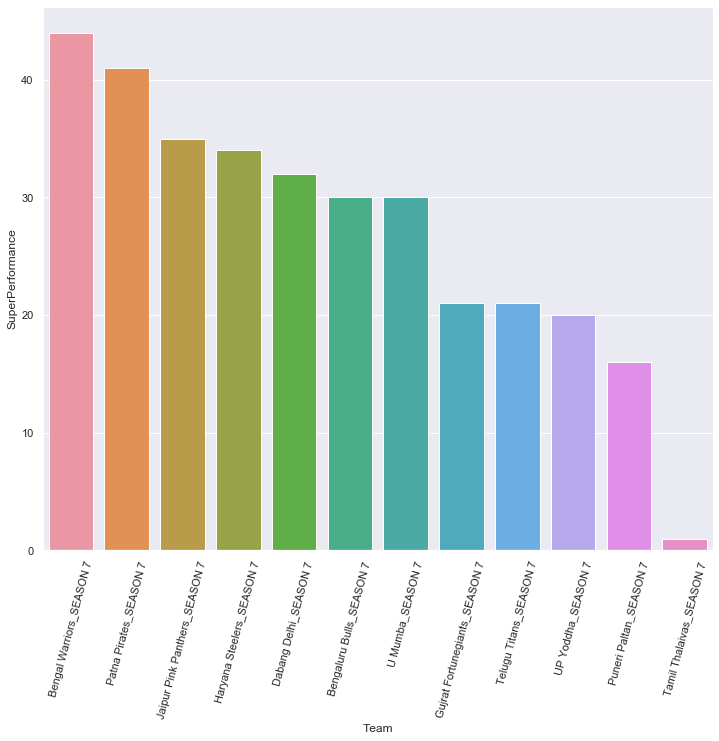

In [55]:
plt.rcParams['figure.figsize'] = [12,10]
df_teams_s7 = df_teams_s7.sort_values(by='SuperPerformance',ascending=False)
a=sns.barplot(x = 'Team', y = 'SuperPerformance', data = df_teams_s7) 
b=plt.setp(a.get_xticklabels(), rotation=75)

#### Insights: 
* Bengal Warrior will be playing playoffs as per our prediction and its immediate competiters are out of the playoffs.
* Hence, Bengal Warrior will emerge as the sole winner of Super performance segment

In [56]:
df_teams_s7.to_csv('C:\\Users\\I330405\\Documents\\HACKATHON\\TeamStastics_Season7.csv', index=False)